<a href="https://colab.research.google.com/github/Harithelamin/Is-poisonous/blob/main/Is_poisonous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ressources



This is a python application to identify whether the mushroom is poisonous or not using Deep Learning,  Neural Networks (CNNs), and Vit transformer.

The data is unlabeled images arranged in two classes, Poisonous, and Edible.






In [5]:
def application_started():
    #
    print('Is-poisonous Application Started, This is to identify whether the mushroom is poisonous or not using Deep Learning')
    print('We used gan archetecture in order to generate more dataset')
    print('Then we used Transformers, VIT archetecture in order to train the modesl')


#Importing, Python, and ML libraries


In [83]:
def importLibraries():
  
  import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, io
  import tensorflow as tf
  from keras import Sequential
  import os
  import glob
  import shutil
  from shutil import copy
  from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense
  #from keras.preprocessing.image import ImageDataGenerator
  
  import torch
  import torch.nn as nn
  import torch.optim as optim
  import torchvision
  from torchvision import datasets, transforms
  import matplotlib.pyplot as plt
  import numpy as np

importLibraries()



print installed libraries

In [7]:
def print_installed_libraries():
    import pkg_resources

    installed_packages = pkg_resources.working_set
    for package in installed_packages:
        print(f"{package.key}=={package.version}")

In [8]:
def connect_to_google_drive():
  from google.colab import drive
  drive.mount('/content/drive')

Define a Python class, to show datasets information

In [9]:
# First we have to define dataset class we are going to use download datasets from url
class Dataset:
    # class variables
    packageName = "Norwegian Mushroom"

    # constructor
    def __init__(self, id, link, cite, data):
        self.id = id
        self.link = link
        self.data = data
        self.cite = cite

        # Instance method

    def show(self):
        print('Inside instance method')
        # access using class name
        print(Dataset.packageName)
        # access using self
        print(self.id, self.link, self.data, self.cite)



# Defining dataset resources
#https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images

# Loading Data from urls
def DefineDatasets():

    # Define the first online dataset with details.
    # The dataset has used to collect Real images to use in Gan
    dataset1 =  Dataset(1,
                       "https://www.istockphoto.com/search/search-by-asset?affiliateredirect=true&assetid=981311660&assettype=image&utm_campaign=SRP_image_sponsored&utm_content=https%3A%2F%2Fpixabay.com%2Fimages%2Fsearch%2Fedible%2520mushroom%2F&utm_medium=affiliate&utm_source=pixabay&utm_term=edible+mushroom",
                       "https://https://www.istockphoto.com/search/search-by-asset?affiliateredirect=true&assetid=981311660&assettype=image&utm_campaign=SRP_image_sponsored&utm_content=https%3A%2F%2Fpixabay.com%2Fimages%2Fsearch%2Fedible%2520mushroom%2F&utm_medium=affiliate&utm_source=pixabay&utm_term=edible+mushroom",
                       ("",)
                       )
    dataset1.show()
    
    # Define the second online dataset with details.
    # The dataset has used to train, val, test,  VIT model with edible, and piossonuous images. They sets as two classes
    dataset1 =  Dataset(2,
                       "https://zenodo.org/records/6378474",
                       "https://zenodo.org/records/6378474",
                       ("",)
                       )
    dataset1.show()
DefineDatasets()    

Inside instance method
Norwegian Mushroom
1 https://www.istockphoto.com/search/search-by-asset?affiliateredirect=true&assetid=981311660&assettype=image&utm_campaign=SRP_image_sponsored&utm_content=https%3A%2F%2Fpixabay.com%2Fimages%2Fsearch%2Fedible%2520mushroom%2F&utm_medium=affiliate&utm_source=pixabay&utm_term=edible+mushroom ('',) https://https://www.istockphoto.com/search/search-by-asset?affiliateredirect=true&assetid=981311660&assettype=image&utm_campaign=SRP_image_sponsored&utm_content=https%3A%2F%2Fpixabay.com%2Fimages%2Fsearch%2Fedible%2520mushroom%2F&utm_medium=affiliate&utm_source=pixabay&utm_term=edible+mushroom
Inside instance method
Norwegian Mushroom
2 https://zenodo.org/records/6378474 ('',) https://zenodo.org/records/6378474


Datasets resources

This function to loading data from kaggle api

In [8]:
! pip install -q kaggle
import os
if not os.path.isfile(os.path.expanduser('~/.kaggle/kaggle.json')):
  from google.colab import files
  print("Upload kaggle.json here")
  files.upload()

if not os.path.isfile('kaggle/mushrooms'):
  !mkdir ~/.kaggle
  !mv ./kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

# data source: https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images
  dataset_name = 'maysee/mushrooms-classification-common-genuss-images'
  zip_name = dataset_name.split('/')[-1]

  !kaggle datasets download -d {dataset_name}
  !unzip -q ./{zip_name}.zip -d .

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
def Loading_Kaggle_data():
      ! pip install -q kaggle
      if not os.path.isfile(os.path.expanduser('~/.kaggle/kaggle.json')):
        from google.colab import files
        print("Upload kaggle.json here")
        files.upload()
        if not os.path.isfile('kaggle/mushrooms'):
          !mkdir ~/.kaggle
          !mv ./kaggle.json ~/.kaggle/
          !chmod 600 ~/.kaggle/kaggle.json

          # data source: https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images
          dataset_name = 'maysee/mushrooms-classification-common-genuss-images'
          zip_name = dataset_name.split('/')[-1]

          !kaggle datasets download -d {dataset_name}
          !unzip -q ./{zip_name}.zip -d .


The data was stored on a google drive, therefore it's important to define this

In [ ]:
if __name__ == '__main__':
  application_started()
  importLibraries()
  print_installed_libraries()
  DefineDatasets()
  connect_to_google_drive()
  Loading_Kaggle_data()


  #Define dirs, and local lists
  dataset_dir = r"../content/Mushrooms/"
  # The path after collecting data
  data_dir = r"../content/drive/MyDrive/Data/"
  train_dir = data_dir + 'Train/'

  Mushrooms_List = list(filter(lambda x: os.path.isdir(os.path.join(dataset_dir, x)), os.listdir(dataset_dir)))
  print (Mushrooms_List)

  # Initializing Edible_List, and Poisonous_List
  Edible_List=['Boletus', 'Cortinarius', 'Lactarius', 'Suillus', 'Hygrocybe']
  Poisonous_List=['Amanita', 'Agaricus', 'Russula', 'Entoloma']

  #
  import os
  import glob
  import shutil
  # To fil all edible mushrooms in Edible_dir
  for mushroom in Edible_List:
    print(mushroom)
    for i in Mushrooms_List:
      if (i == mushroom):
        print(dataset_dir + i)
        print(train_dir + 'Edible')
        for jpgfile in glob.iglob(os.path.join(dataset_dir + i,"*.jpg")):
          print(jpgfile)
          shutil.copy(jpgfile, train_dir + 'Edible')
          #print("Edible Data has been collected form all Edible directory" + dataset_dir +  "to"  + train_dir +  "successfully")


  # To fil all Poisonous mushrooms in Poisonous_dir
  for mushroom in Poisonous_List:
    print(mushroom)
    for i in Mushrooms_List:
      if (i == mushroom):
        print(dataset_dir + i)
        print(train_dir + 'Poisonous')
        for jpgfile in glob.iglob(os.path.join(dataset_dir + i,"*.jpg")):
          print(jpgfile)
          shutil.copy(jpgfile, train_dir + 'Poisonous')
          #print("Poisonous Data has been collected form all Poisonous directory" + dataset_dir +  "to"  + train_dir +  "successfully")









 Is-poisonous Application Started, This is to identify whether the mushroom is poisonous or not using Deep Learning
babel==2.14.0
cython==3.0.8
flask==2.2.5
gdal==3.6.4
jinja2==3.1.3
markdown==3.5.2
markupsafe==2.1.5
pillow==9.4.0
pydrive==1.3.1
pydrive2==1.6.3
pyopengl==3.1.7
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.16.1
sqlalchemy==2.0.27
send2trash==1.8.2
sphinx==5.0.2
absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.21.0
bleach==6.1.0
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.0.3
cachecontrol==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
cha

Train data details

In [ ]:
#
import os
count = 0
print("*****************")
train_edible_dir = train_dir + 'Edible'
for item in os.listdir(train_edible_dir):
    item_path = os.path.join(train_edible_dir, item)
    if os.path.isfile(item_path):
        count += 1
print('Number of Edible images is :', count)


*****************
Number of Edible images is : 5202


In [ ]:
#
import os
count = 0
print("*****************")
train_edible_dir = train_dir + 'Poisonous'
for item in os.listdir(train_edible_dir):
    item_path = os.path.join(train_edible_dir, item)
    if os.path.isfile(item_path):
        count += 1
print('Number of Poisonous images is :', count)


*****************
Number of Poisonous images is : 4524


In [ ]:
import pathlib
data_dir = "../content/drive/MyDrive/Data/"
#data_dir = pathlib.Path("/path/to/dir/")

count = len(list(data_dir.rglob("*/*.jpg")))

AttributeError: 'str' object has no attribute 'rglob'

Validation data details

configuration images size for the Neural Network model


training the images using train_image_generator from keras

In [116]:
# Define data path (version 2)

data_dir =r"input/mushrooms/trainx"
train_data = r"input/mushrooms/trainx"
validate_data =  r"input/mushrooms/trainx"
test_data =  r"input/mushrooms/trainx"

# for predecting
test_image = r"input/mushrooms/test/test.jpg"

In [117]:
# Hiberparamaters
image_size = 72
target_size = (32, 32)
input_shape = (32, 32, 3)
num_classes = 2

batch_size = 256 #128
seed= 42
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 10 
# We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size  // patch_size) ** 2
projection_dim = 64
num_heads = 4
# Size of transformer layers
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  
# Size of the dense layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
] 

In [118]:
# Load the training and validation datasets
# Setup
#from keras.src.legacy.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2)

def dataGenerator(directory, target_size, batch_size, seed):
    generator = data_generator.flow_from_directory(
        directory,
        target_size= target_size,
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
        seed=seed,
        subset='training')
    return generator



In [115]:
# Data generator from directory
train_generator= dataGenerator(train_data, target_size, batch_size, seed)
validate_generator= dataGenerator(validate_data, target_size, batch_size, seed)
test_generator= dataGenerator(test_data, target_size, batch_size, seed)

TypeError: listdir: path should be string, bytes, os.PathLike or None, not ImageFolder

In [97]:
# Data spilit
def split_data(train_generator,validate_generator ):
    X_train, y_train = next(train_generator)
    X_test, y_test = next(validate_generator)
    return X_train, y_train, X_test, y_test

In [98]:
# Split data
import scipy
X_train, y_train, X_test, y_test=split_data(train_generator, validate_generator)
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (29, 32, 32, 3) - y_train shape: (29, 2)
x_test shape: (29, 32, 32, 3) - y_test shape: (29, 2)


In [70]:
# Set device
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [71]:
# Data loader
#RealEdibleImages_dataloader = torch.utils.data.DataLoader("input/mushrooms/RealEdibleImages", batch_size=32, shuffle=True)
#RealPoisonousImages_dataloader = torch.utils.data.DataLoader("input/mushrooms/RealPoisonousImages", batch_size=32, shuffle=True)

In [90]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10

In [91]:
# Define a basic transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [32]:
# Define the generator model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
 
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )
 
    def forward(self, z):
        img = self.model(z)
        return img

In [34]:
# Define the discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
 
        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(128, momentum=0.82),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256, momentum=0.8),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(256 * 5 * 5, 1),
        nn.Sigmoid()
    )
 
        def forward(self, img):
            validity = self.model(img)
            return validity

In [35]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

In [36]:
# Loss function
adversarial_loss = nn.BCELoss()

In [37]:
# Optimizer function
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

In [92]:
import os
print(os.listdir("input"))

['mushrooms']


In [105]:
# train the loader with transformer
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('input/mushrooms/trainx/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)
                                           
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


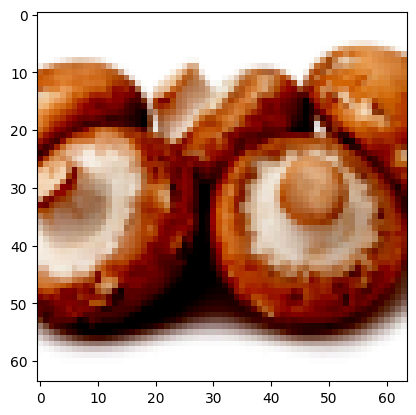

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


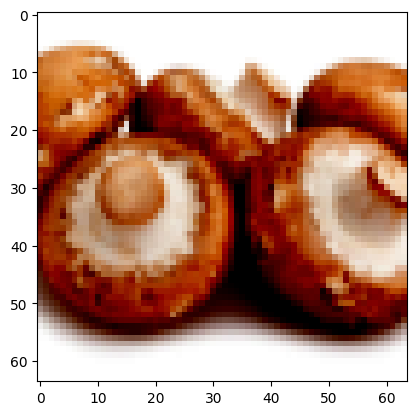

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


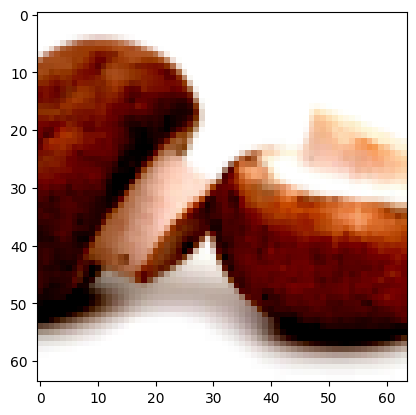

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


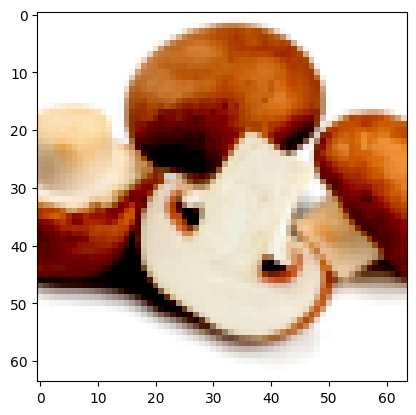

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


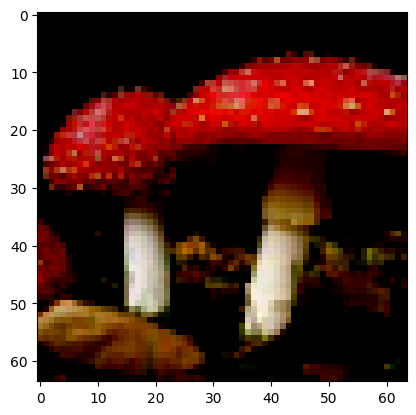

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


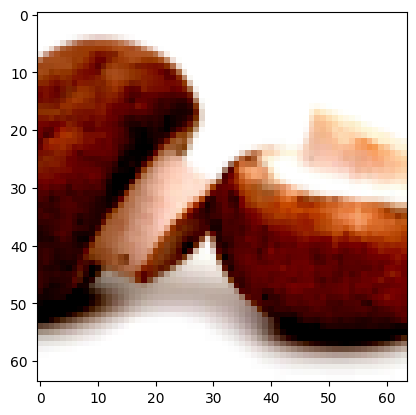

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


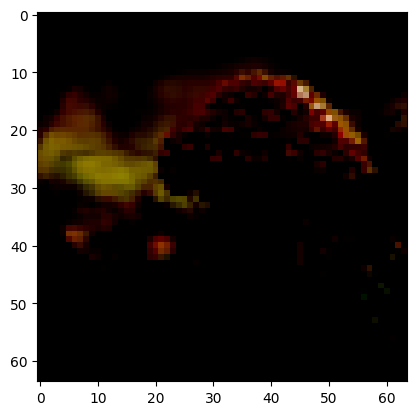

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


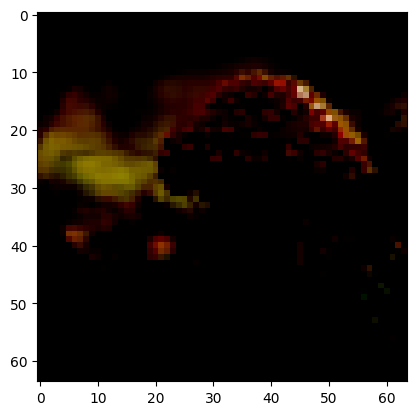

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


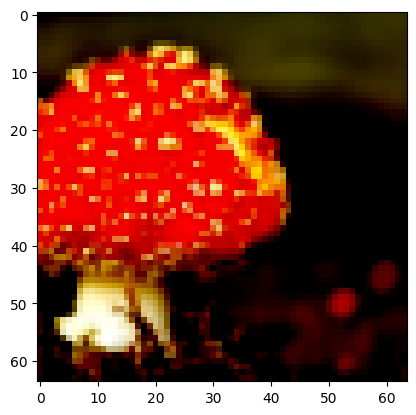

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


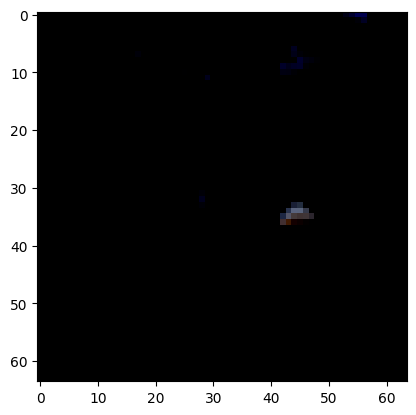

In [106]:
for i in range(10):
    plt.imshow(imgs[i])
    plt.show()

In [45]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [46]:
# Generater model
class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )
        
    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [47]:
# Discriminator model
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )
        
    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)
    
    
# Creating the discriminator
netD = D()
netD.apply(weights_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [48]:
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()
        
        self.nz = nz
        self.channels = channels
        
        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img

    
class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()
        
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)
    
        return out.view(-1, 1)

In [49]:
!mkdir results
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
EPOCH = 0 # play with me
LR = 0.001
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

In [51]:
EPOCH = 0
LR = 0.001
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

In [52]:
# train the gan
for epoch in range(EPOCH):
    for i, data in enumerate(dataloader, 0):
        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad()
        
        # Training the discriminator with a real image of the dataset
        real,_ = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)
        
        # Training the discriminator with a fake image generated by the generator
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)
        
        # Backpropagating the total error
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()
        
        # 2nd Step: Updating the weights of the neural network of the generator
        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()
        
        # 3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps
        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(dataloader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize=True)

In [53]:
batch_size = 32
LR_G = 0.001
LR_D = 0.0005

beta1 = 0.5
epochs = 100

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [54]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

In [ ]:
def show_generated_img(n_images=50):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)
    
    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)
        
    plt.show()
    plt.close()

In [55]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="Generator")
    plt.plot(D_losses,label="Discriminator")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

 50%|█████     | 1/2 [00:01<00:01,  1.75s/it]

[1/100][1/2] Loss_D: 2.5932 Loss_G: 1.4321 D(x): 0.1519 D(G(z)): 0.4126 / 0.2353


100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

[1/100][2/2] Loss_D: 1.4028 Loss_G: 1.7624 D(x): 0.4867 D(G(z)): 0.2982 / 0.1985


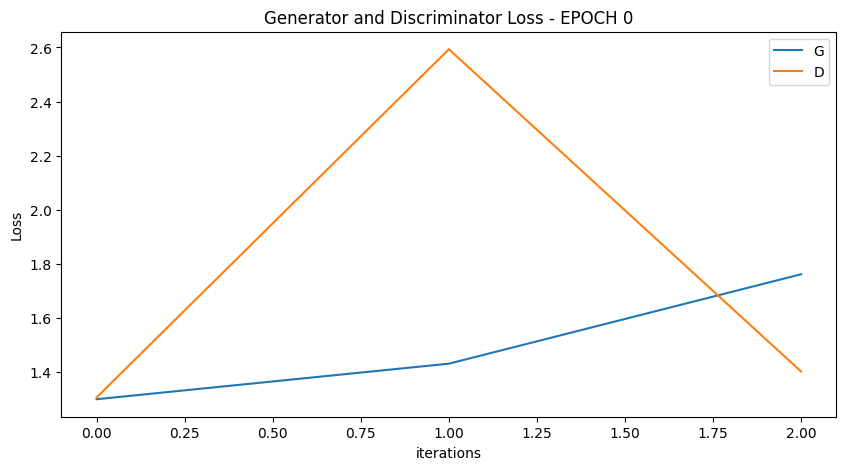

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


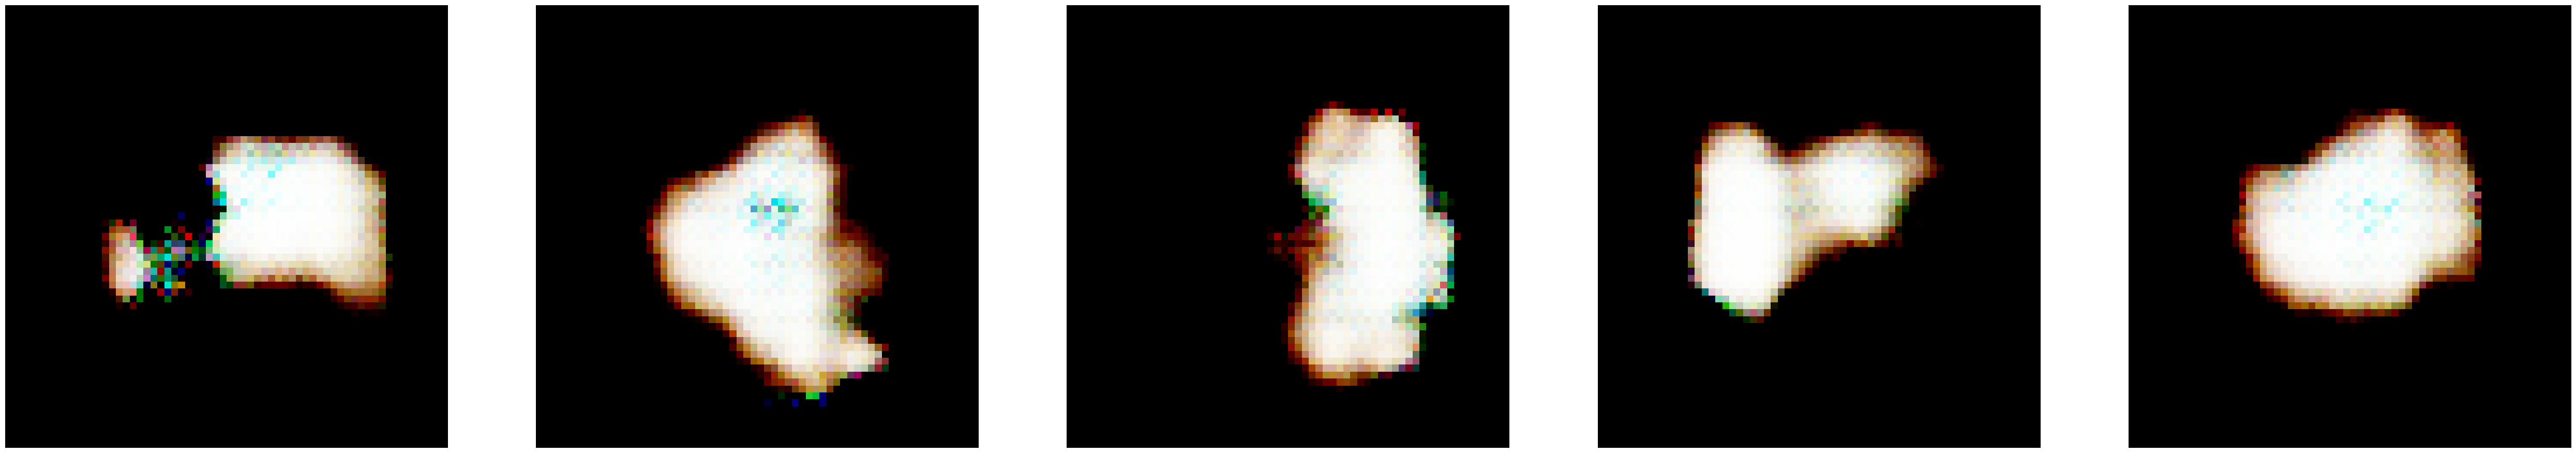

 50%|█████     | 1/2 [00:01<00:01,  1.77s/it]

[2/100][1/2] Loss_D: 0.8928 Loss_G: 2.1438 D(x): 0.8422 D(G(z)): 0.3493 / 0.1482


100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

[2/100][2/2] Loss_D: 0.5510 Loss_G: 2.7117 D(x): 0.8505 D(G(z)): 0.1722 / 0.0624


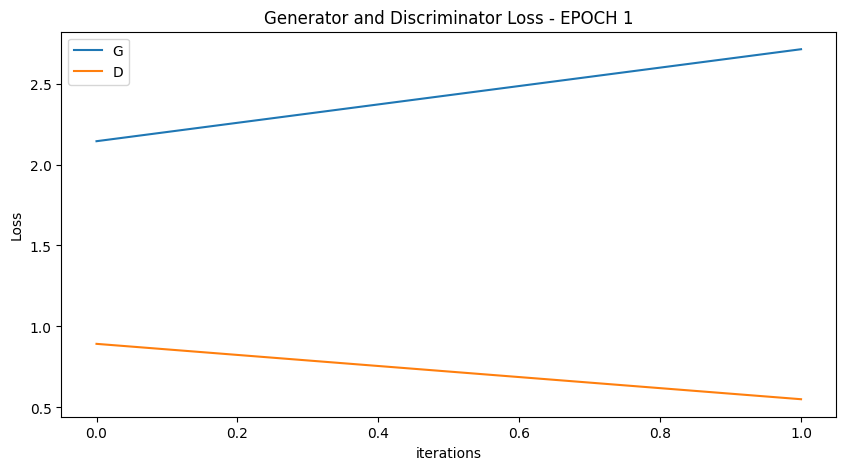

 50%|█████     | 1/2 [00:01<00:01,  1.99s/it]

[3/100][1/2] Loss_D: 0.6044 Loss_G: 2.6628 D(x): 0.8259 D(G(z)): 0.1938 / 0.0737


100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

[3/100][2/2] Loss_D: 0.7371 Loss_G: 2.4855 D(x): 0.5992 D(G(z)): 0.1374 / 0.0709


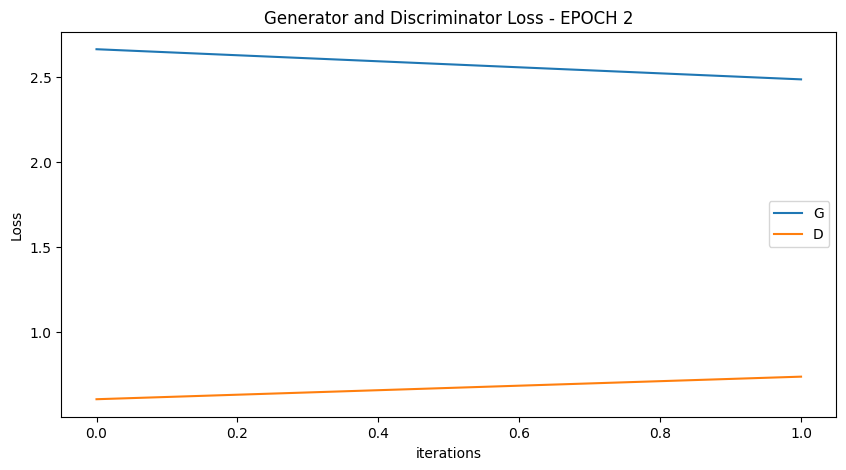

 50%|█████     | 1/2 [00:01<00:01,  1.72s/it]

[4/100][1/2] Loss_D: 1.0320 Loss_G: 2.4266 D(x): 0.8238 D(G(z)): 0.3833 / 0.0893


100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

[4/100][2/2] Loss_D: 0.7683 Loss_G: 3.3730 D(x): 0.7982 D(G(z)): 0.2458 / 0.0275


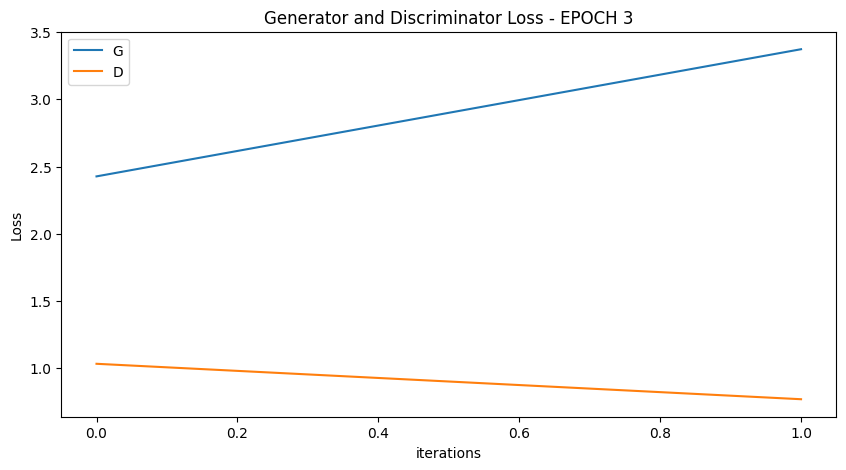

 50%|█████     | 1/2 [00:01<00:01,  1.65s/it]

[5/100][1/2] Loss_D: 0.8454 Loss_G: 2.1479 D(x): 0.4837 D(G(z)): 0.0716 / 0.1178


100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

[5/100][2/2] Loss_D: 1.3439 Loss_G: 1.9729 D(x): 0.5568 D(G(z)): 0.4303 / 0.1364


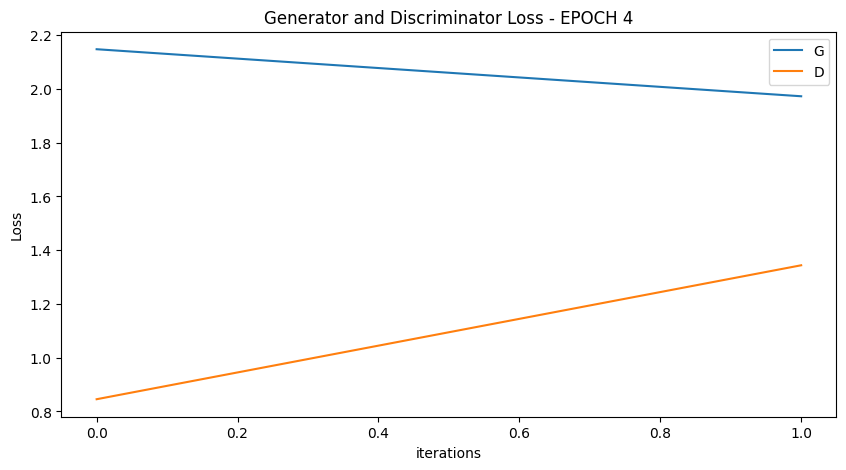

 50%|█████     | 1/2 [00:01<00:01,  1.72s/it]

[6/100][1/2] Loss_D: 1.0126 Loss_G: 2.5349 D(x): 0.7026 D(G(z)): 0.3435 / 0.0906


100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

[6/100][2/2] Loss_D: 1.8157 Loss_G: 1.6422 D(x): 0.2927 D(G(z)): 0.3166 / 0.2370


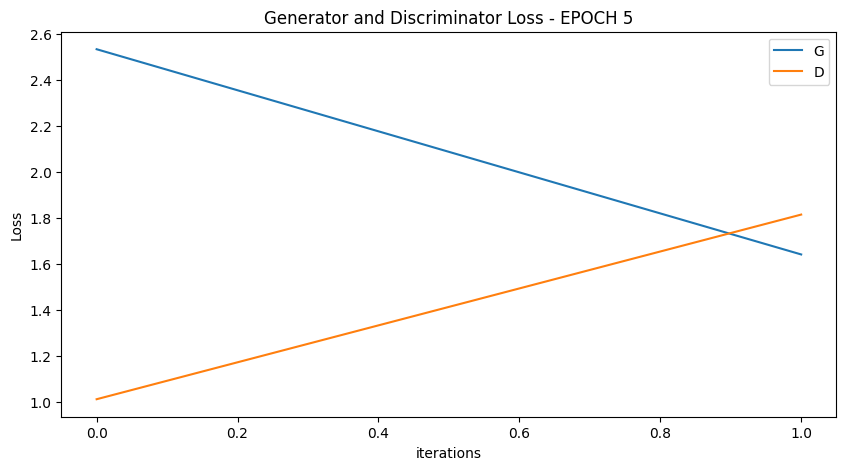

 50%|█████     | 1/2 [00:01<00:01,  1.77s/it]

[7/100][1/2] Loss_D: 1.1083 Loss_G: 1.4156 D(x): 0.6311 D(G(z)): 0.3897 / 0.2434


100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

[7/100][2/2] Loss_D: 1.1581 Loss_G: 1.6502 D(x): 0.5767 D(G(z)): 0.3466 / 0.1728


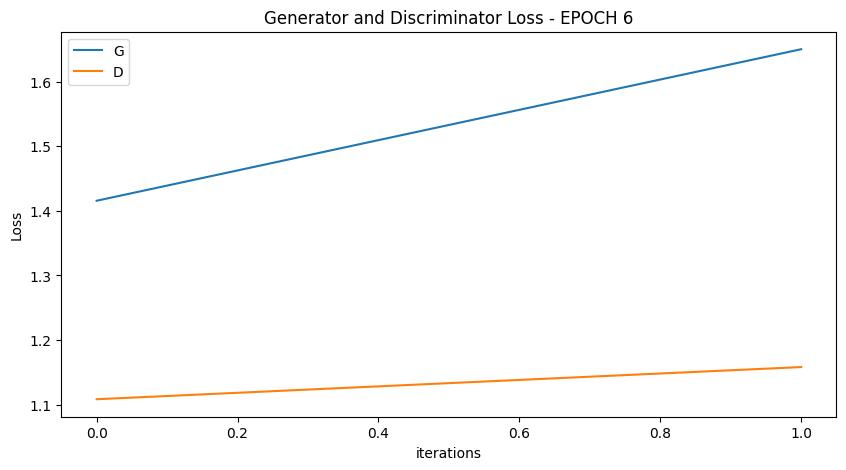

 50%|█████     | 1/2 [00:02<00:02,  2.30s/it]

[8/100][1/2] Loss_D: 1.1254 Loss_G: 1.6595 D(x): 0.6002 D(G(z)): 0.3920 / 0.1813


100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

[8/100][2/2] Loss_D: 0.9244 Loss_G: 2.3493 D(x): 0.7522 D(G(z)): 0.3298 / 0.0893


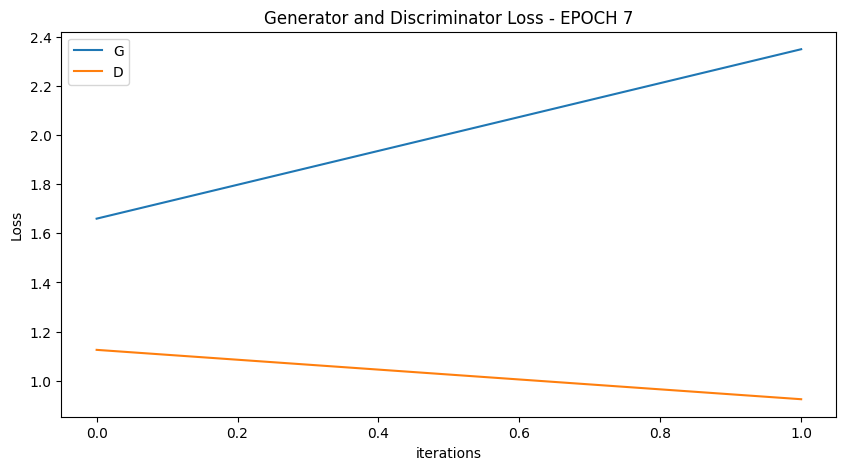

 50%|█████     | 1/2 [00:02<00:02,  2.32s/it]

[9/100][1/2] Loss_D: 1.1758 Loss_G: 1.9310 D(x): 0.4953 D(G(z)): 0.3055 / 0.1534


100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

[9/100][2/2] Loss_D: 1.0909 Loss_G: 1.8548 D(x): 0.4765 D(G(z)): 0.2666 / 0.1406


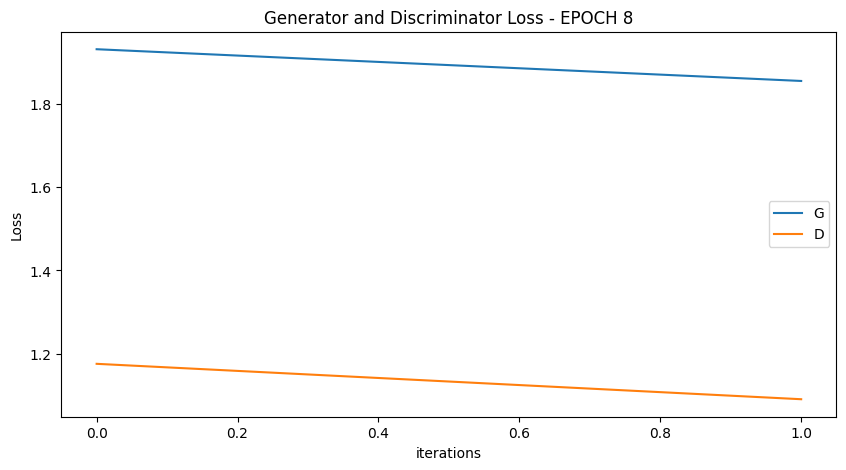

 50%|█████     | 1/2 [00:02<00:02,  2.24s/it]

[10/100][1/2] Loss_D: 0.8970 Loss_G: 2.0976 D(x): 0.6584 D(G(z)): 0.2833 / 0.1157


100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

[10/100][2/2] Loss_D: 0.6882 Loss_G: 2.5141 D(x): 0.7943 D(G(z)): 0.2429 / 0.1041


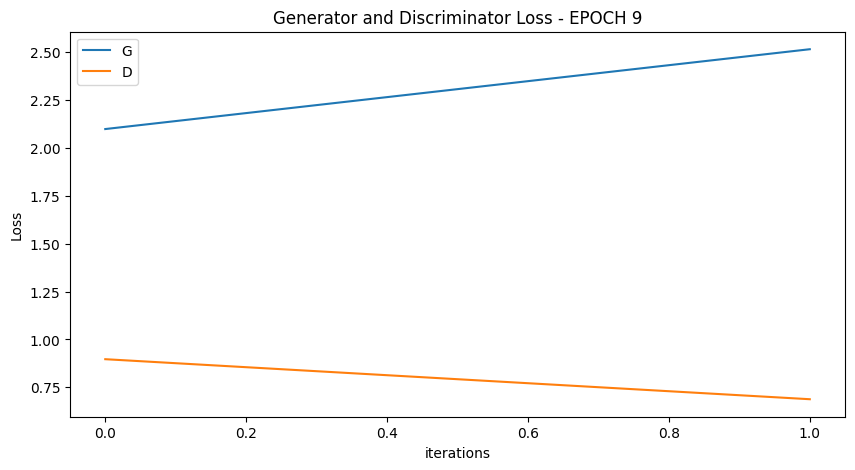

 50%|█████     | 1/2 [00:02<00:02,  2.19s/it]

[11/100][1/2] Loss_D: 1.1387 Loss_G: 2.6221 D(x): 0.6772 D(G(z)): 0.4223 / 0.0655


100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


[11/100][2/2] Loss_D: 1.1810 Loss_G: 1.8242 D(x): 0.4787 D(G(z)): 0.2656 / 0.1497


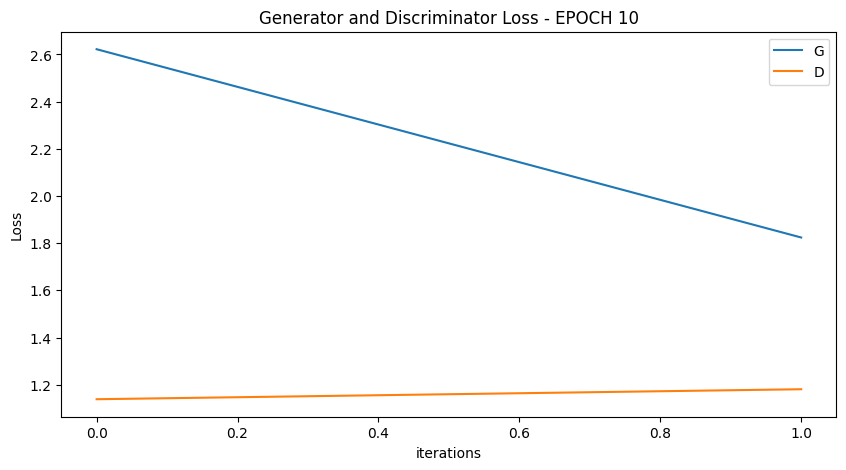

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


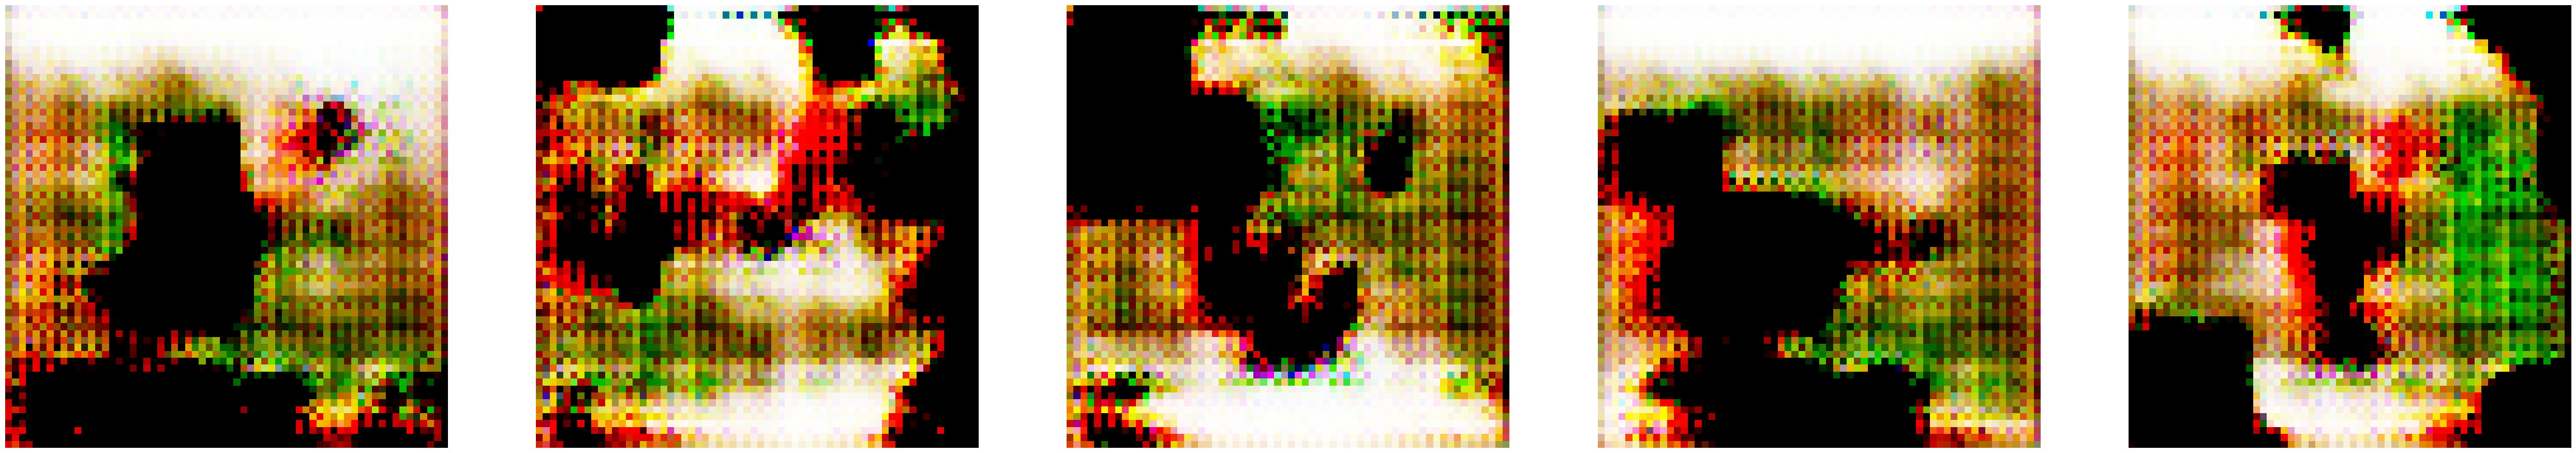

 50%|█████     | 1/2 [00:02<00:02,  2.36s/it]

[12/100][1/2] Loss_D: 1.2986 Loss_G: 1.2887 D(x): 0.5429 D(G(z)): 0.3579 / 0.3091


100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

[12/100][2/2] Loss_D: 0.9954 Loss_G: 2.7813 D(x): 0.8143 D(G(z)): 0.4310 / 0.0659


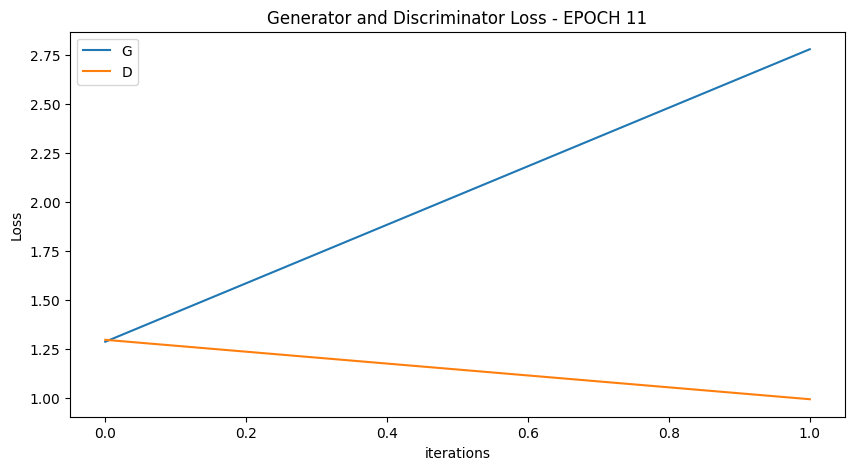

 50%|█████     | 1/2 [00:02<00:02,  2.13s/it]

[13/100][1/2] Loss_D: 1.1230 Loss_G: 2.3606 D(x): 0.5445 D(G(z)): 0.2218 / 0.1113


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

[13/100][2/2] Loss_D: 2.1320 Loss_G: 1.4227 D(x): 0.2258 D(G(z)): 0.3089 / 0.2880


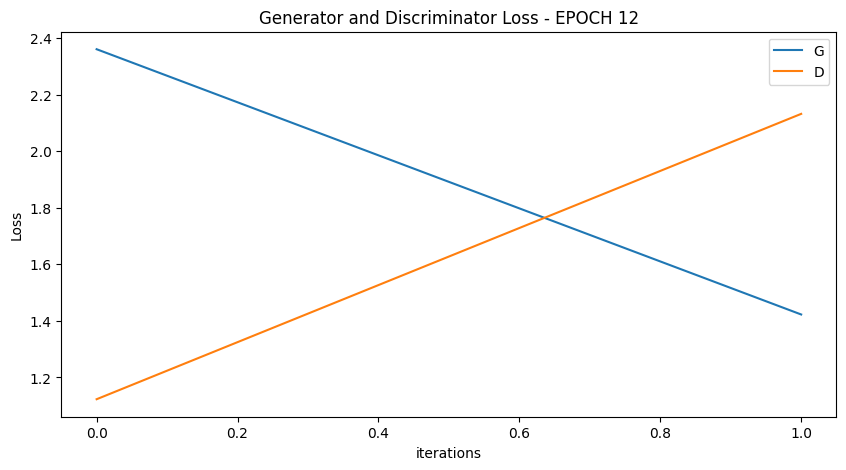

 50%|█████     | 1/2 [00:02<00:02,  2.17s/it]

[14/100][1/2] Loss_D: 1.6376 Loss_G: 2.2857 D(x): 0.6765 D(G(z)): 0.5724 / 0.1093


100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

[14/100][2/2] Loss_D: 0.8078 Loss_G: 2.8836 D(x): 0.6569 D(G(z)): 0.2294 / 0.0475


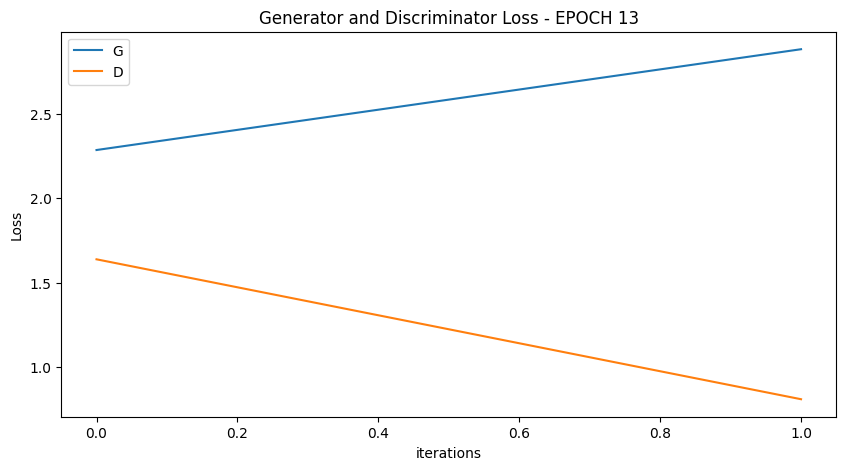

 50%|█████     | 1/2 [00:02<00:02,  2.12s/it]

[15/100][1/2] Loss_D: 1.1007 Loss_G: 1.7319 D(x): 0.5340 D(G(z)): 0.2679 / 0.1901


100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

[15/100][2/2] Loss_D: 1.3484 Loss_G: 1.9142 D(x): 0.4206 D(G(z)): 0.3010 / 0.1617


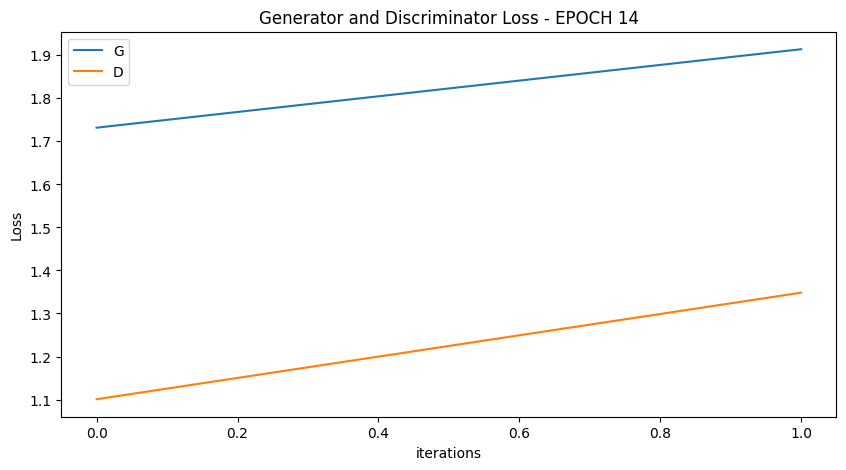

 50%|█████     | 1/2 [00:02<00:02,  2.14s/it]

[16/100][1/2] Loss_D: 0.9783 Loss_G: 2.8624 D(x): 0.8029 D(G(z)): 0.4318 / 0.0538


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

[16/100][2/2] Loss_D: 0.7454 Loss_G: 2.7977 D(x): 0.6768 D(G(z)): 0.2248 / 0.0580


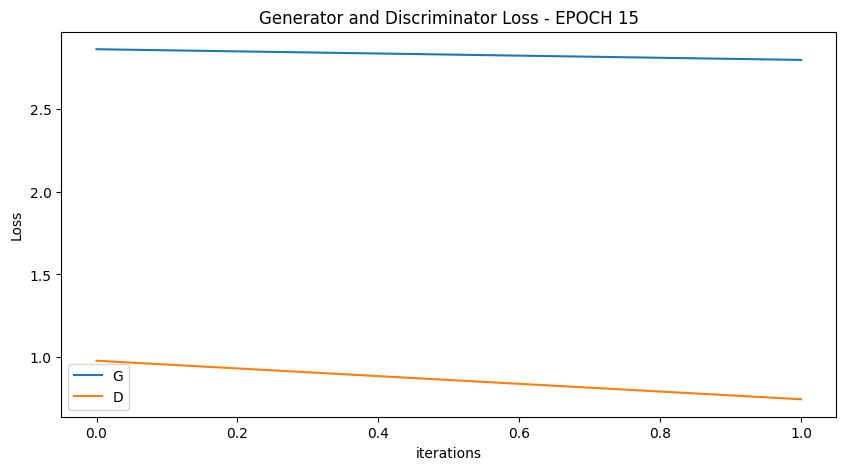

 50%|█████     | 1/2 [00:02<00:02,  2.20s/it]

[17/100][1/2] Loss_D: 1.0856 Loss_G: 1.3532 D(x): 0.4832 D(G(z)): 0.2462 / 0.2641


100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

[17/100][2/2] Loss_D: 1.1895 Loss_G: 2.0334 D(x): 0.7025 D(G(z)): 0.4784 / 0.1119


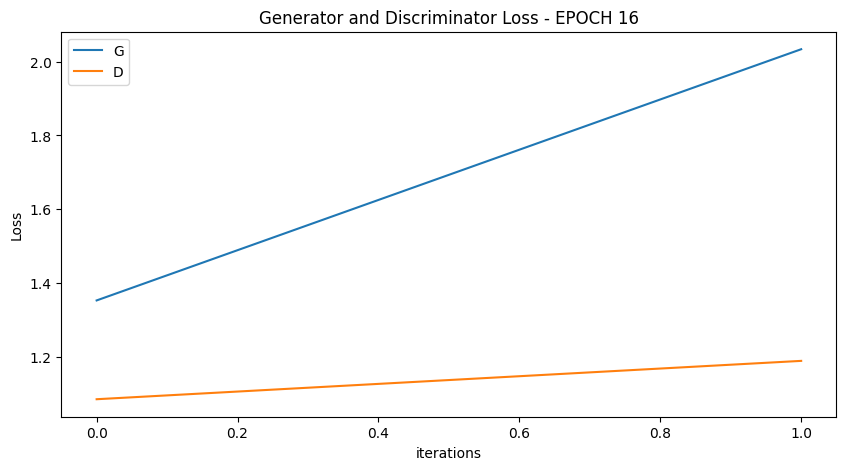

 50%|█████     | 1/2 [00:02<00:02,  2.32s/it]

[18/100][1/2] Loss_D: 1.0595 Loss_G: 2.2182 D(x): 0.5688 D(G(z)): 0.3025 / 0.0998


100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

[18/100][2/2] Loss_D: 1.1309 Loss_G: 1.7118 D(x): 0.4424 D(G(z)): 0.2436 / 0.1612


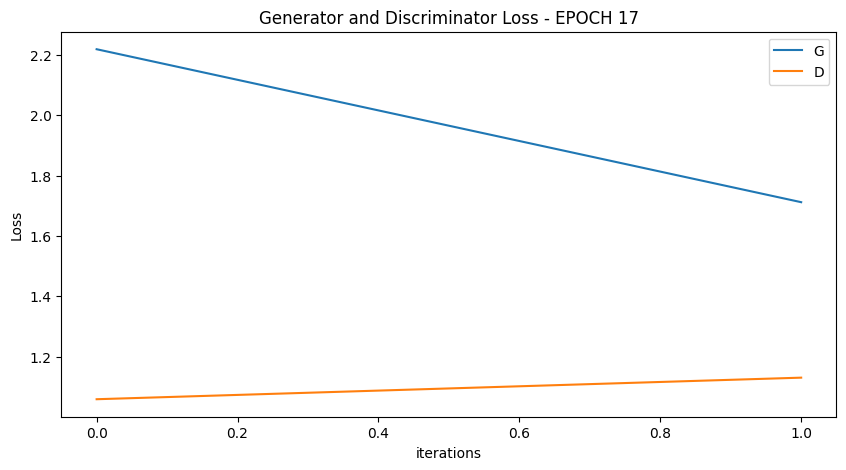

 50%|█████     | 1/2 [00:02<00:02,  2.27s/it]

[19/100][1/2] Loss_D: 0.9017 Loss_G: 1.9450 D(x): 0.7303 D(G(z)): 0.3363 / 0.1389


100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

[19/100][2/2] Loss_D: 1.0673 Loss_G: 2.9964 D(x): 0.7527 D(G(z)): 0.4353 / 0.0455


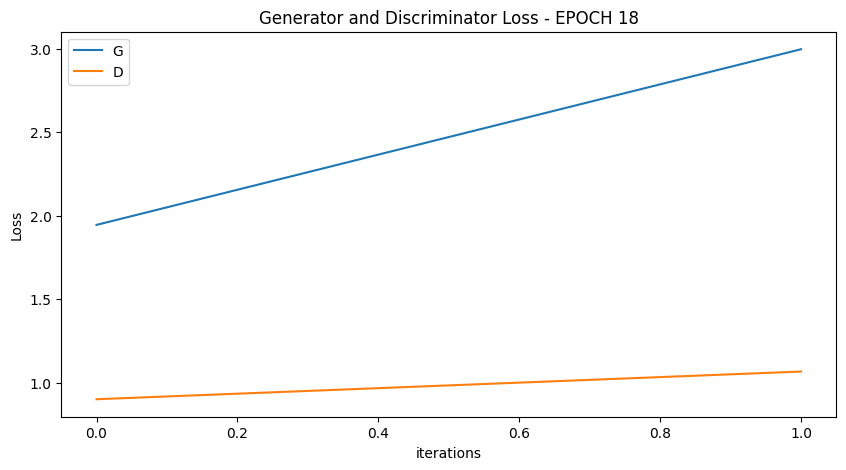

 50%|█████     | 1/2 [00:02<00:02,  2.12s/it]

[20/100][1/2] Loss_D: 1.0506 Loss_G: 1.4635 D(x): 0.4299 D(G(z)): 0.1411 / 0.2301


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

[20/100][2/2] Loss_D: 1.5340 Loss_G: 2.2151 D(x): 0.5568 D(G(z)): 0.5221 / 0.1310


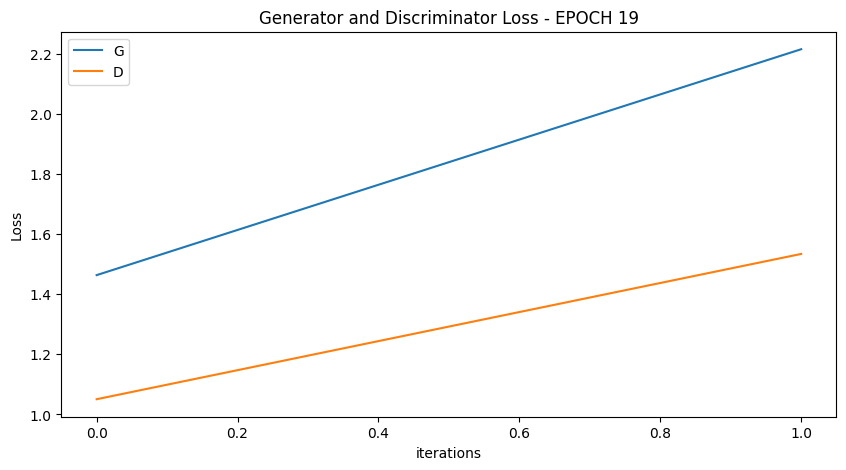

 50%|█████     | 1/2 [00:02<00:02,  2.19s/it]

[21/100][1/2] Loss_D: 1.0832 Loss_G: 2.2511 D(x): 0.5837 D(G(z)): 0.2888 / 0.1046


100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

[21/100][2/2] Loss_D: 0.7463 Loss_G: 2.2853 D(x): 0.5976 D(G(z)): 0.1227 / 0.0995


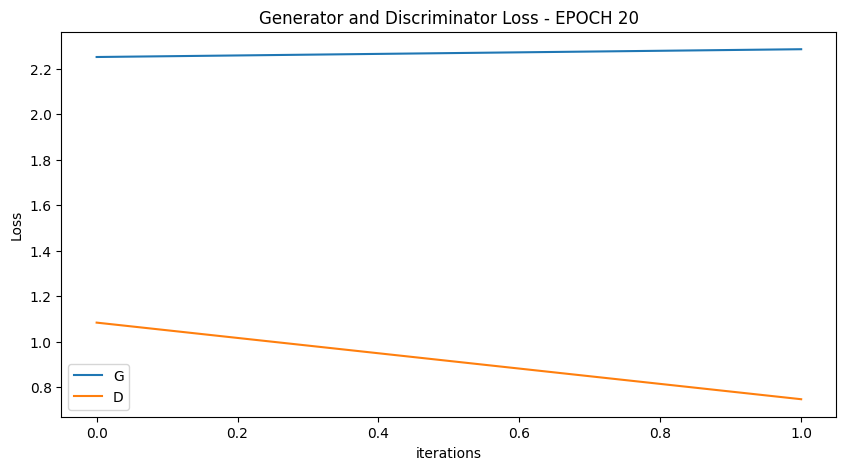

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


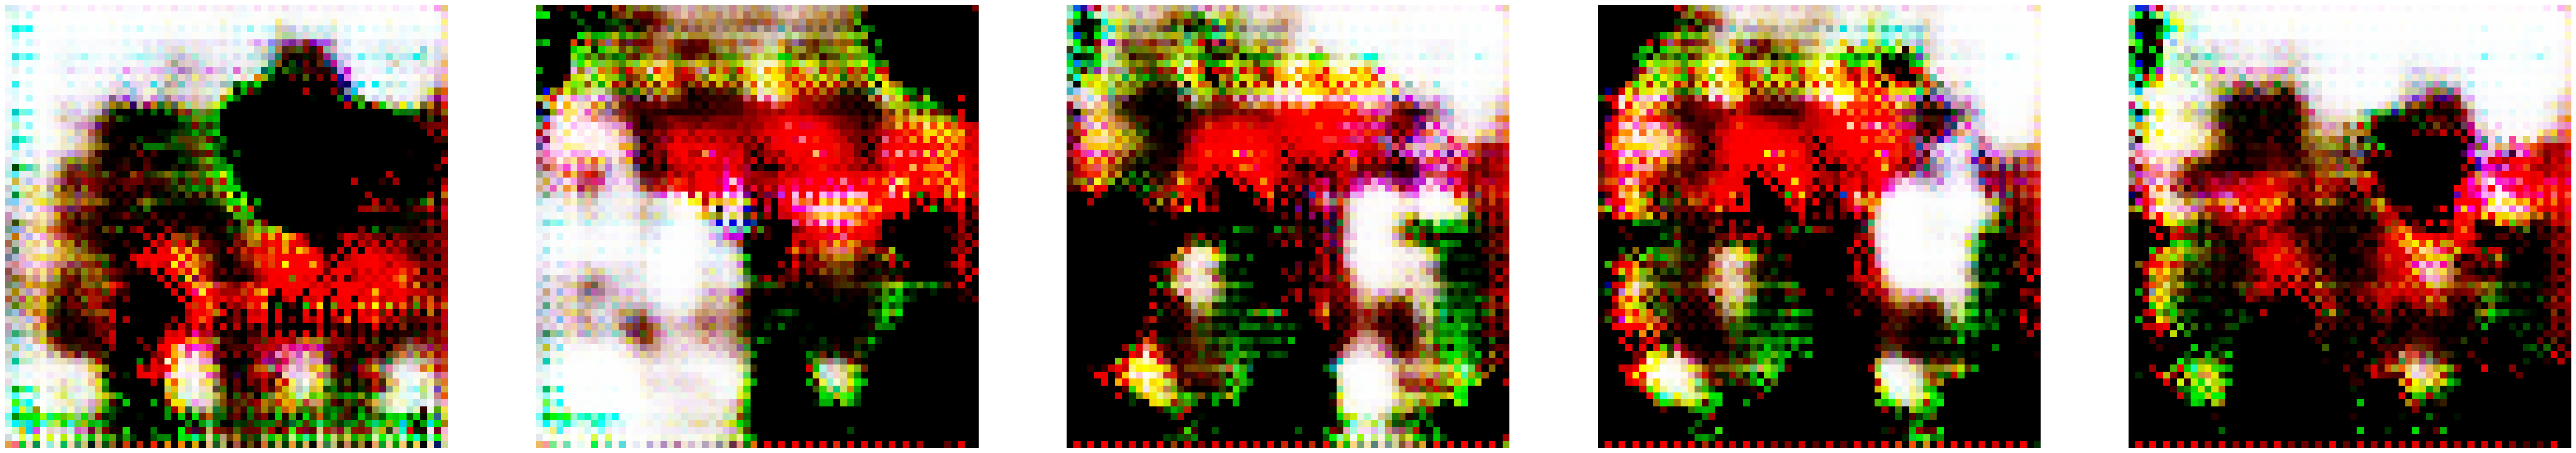

 50%|█████     | 1/2 [00:02<00:02,  2.11s/it]

[22/100][1/2] Loss_D: 1.2030 Loss_G: 2.6029 D(x): 0.7438 D(G(z)): 0.4611 / 0.0598


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

[22/100][2/2] Loss_D: 1.2103 Loss_G: 1.7725 D(x): 0.3723 D(G(z)): 0.1114 / 0.1688


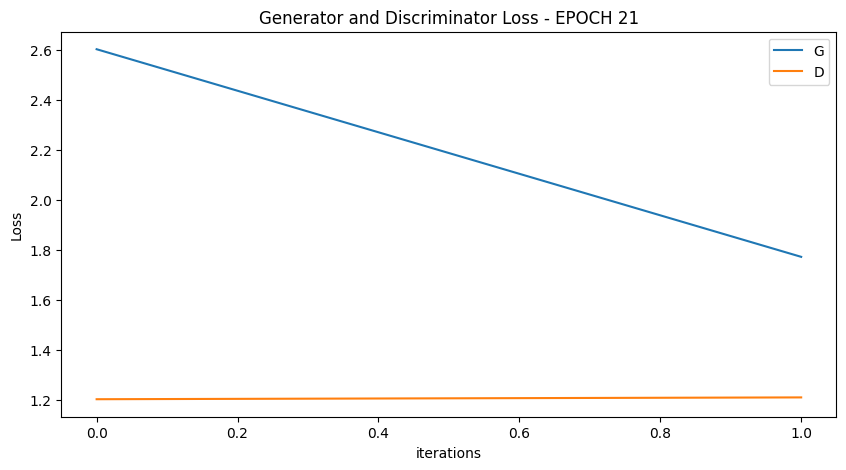

 50%|█████     | 1/2 [00:02<00:02,  2.11s/it]

[23/100][1/2] Loss_D: 1.0204 Loss_G: 2.3027 D(x): 0.7740 D(G(z)): 0.4300 / 0.0928


100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

[23/100][2/2] Loss_D: 1.3833 Loss_G: 2.5288 D(x): 0.4597 D(G(z)): 0.3564 / 0.0833


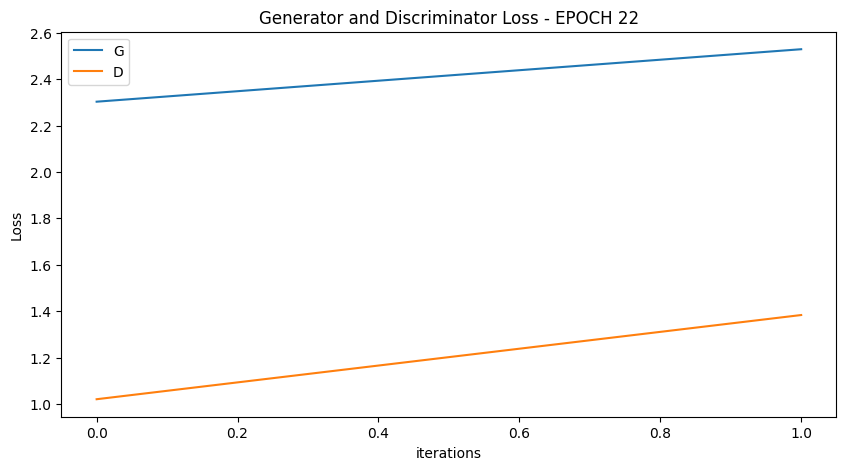

 50%|█████     | 1/2 [00:02<00:02,  2.49s/it]

[24/100][1/2] Loss_D: 0.9230 Loss_G: 2.3089 D(x): 0.6042 D(G(z)): 0.2297 / 0.1037


100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

[24/100][2/2] Loss_D: 1.1444 Loss_G: 3.1894 D(x): 0.6123 D(G(z)): 0.3762 / 0.0410


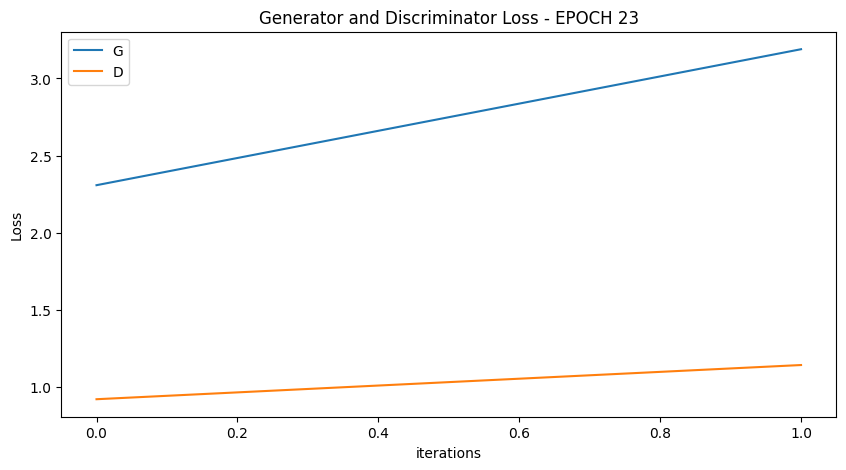

 50%|█████     | 1/2 [00:02<00:02,  2.23s/it]

[25/100][1/2] Loss_D: 0.9274 Loss_G: 2.2617 D(x): 0.5407 D(G(z)): 0.1245 / 0.1143


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


[25/100][2/2] Loss_D: 0.7607 Loss_G: 2.2162 D(x): 0.7270 D(G(z)): 0.2587 / 0.0891


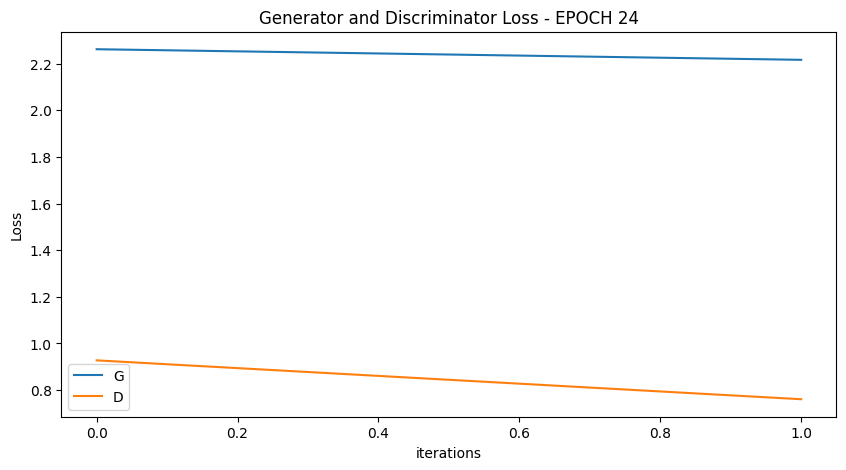

 50%|█████     | 1/2 [00:02<00:02,  2.22s/it]

[26/100][1/2] Loss_D: 0.8534 Loss_G: 3.0205 D(x): 0.8190 D(G(z)): 0.3662 / 0.0400


100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

[26/100][2/2] Loss_D: 1.2649 Loss_G: 1.7011 D(x): 0.3661 D(G(z)): 0.0973 / 0.1786


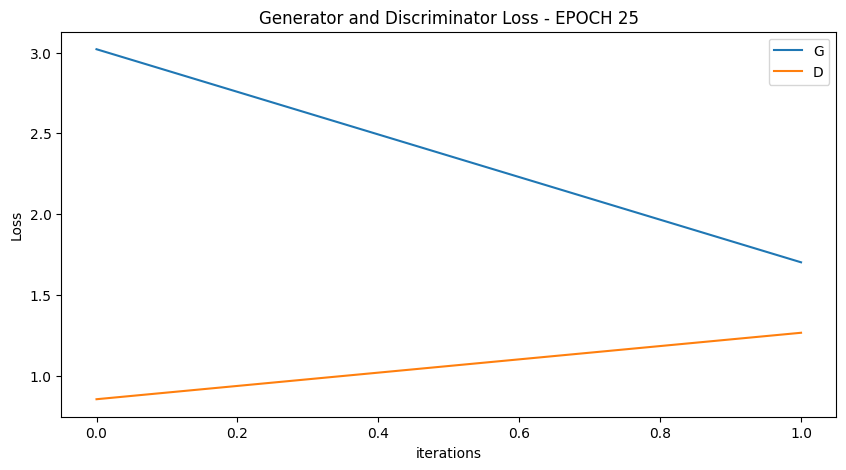

 50%|█████     | 1/2 [00:02<00:02,  2.59s/it]

[27/100][1/2] Loss_D: 0.9051 Loss_G: 2.4507 D(x): 0.8049 D(G(z)): 0.3911 / 0.0699


100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

[27/100][2/2] Loss_D: 0.6466 Loss_G: 2.3119 D(x): 0.7122 D(G(z)): 0.1196 / 0.0877


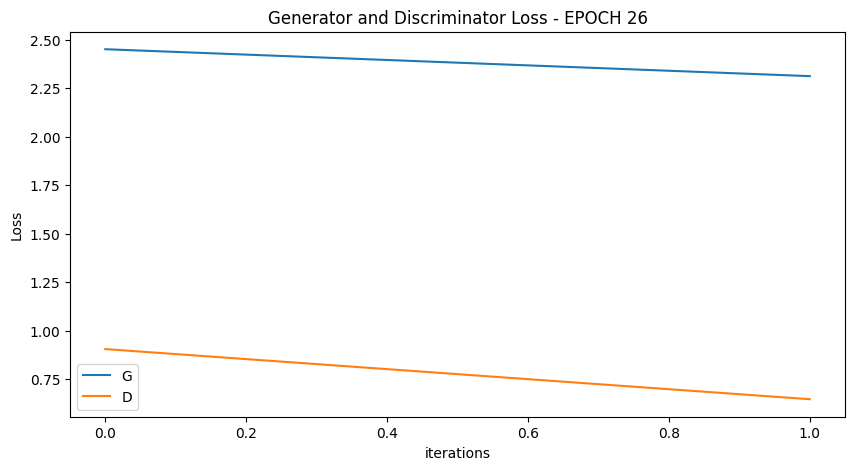

 50%|█████     | 1/2 [00:02<00:02,  2.48s/it]

[28/100][1/2] Loss_D: 0.8457 Loss_G: 1.4677 D(x): 0.6063 D(G(z)): 0.2125 / 0.2207


100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

[28/100][2/2] Loss_D: 0.9181 Loss_G: 2.0950 D(x): 0.7245 D(G(z)): 0.3571 / 0.1119


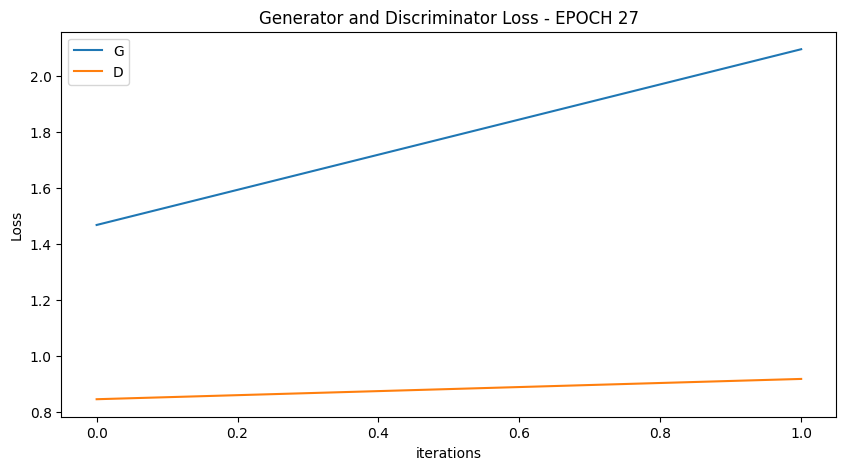

 50%|█████     | 1/2 [00:02<00:02,  2.37s/it]

[29/100][1/2] Loss_D: 0.6748 Loss_G: 2.4379 D(x): 0.7354 D(G(z)): 0.1930 / 0.0781


100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

[29/100][2/2] Loss_D: 0.7213 Loss_G: 2.3453 D(x): 0.7416 D(G(z)): 0.2216 / 0.0786


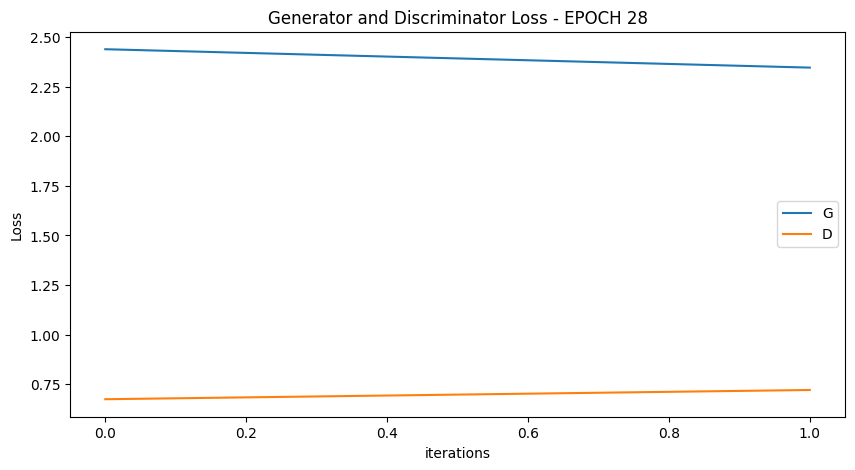

 50%|█████     | 1/2 [00:02<00:02,  2.23s/it]

[30/100][1/2] Loss_D: 0.7721 Loss_G: 2.1018 D(x): 0.6564 D(G(z)): 0.2171 / 0.1042


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

[30/100][2/2] Loss_D: 0.6400 Loss_G: 3.0008 D(x): 0.7448 D(G(z)): 0.1865 / 0.0374


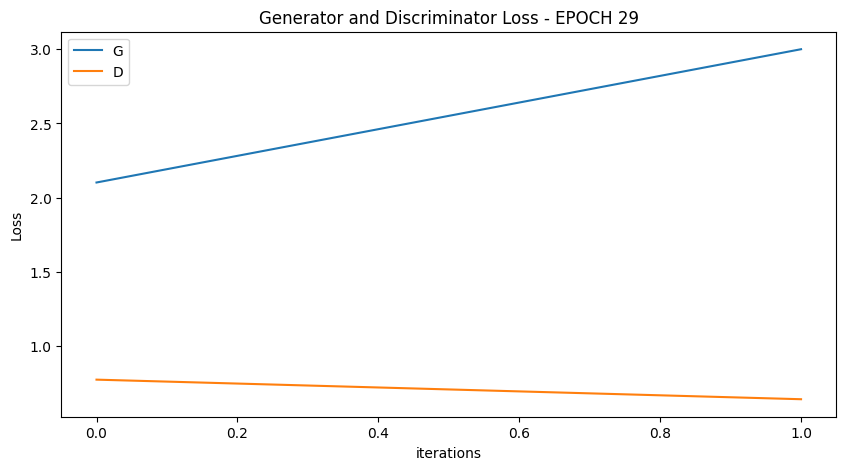

 50%|█████     | 1/2 [00:02<00:02,  2.47s/it]

[31/100][1/2] Loss_D: 0.6973 Loss_G: 2.1895 D(x): 0.6599 D(G(z)): 0.1430 / 0.0958


100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

[31/100][2/2] Loss_D: 0.9257 Loss_G: 3.2794 D(x): 0.6962 D(G(z)): 0.3190 / 0.0291


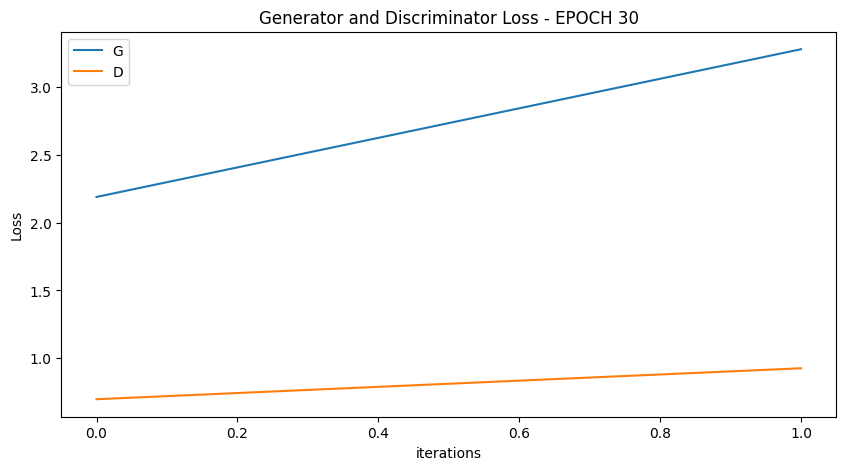

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


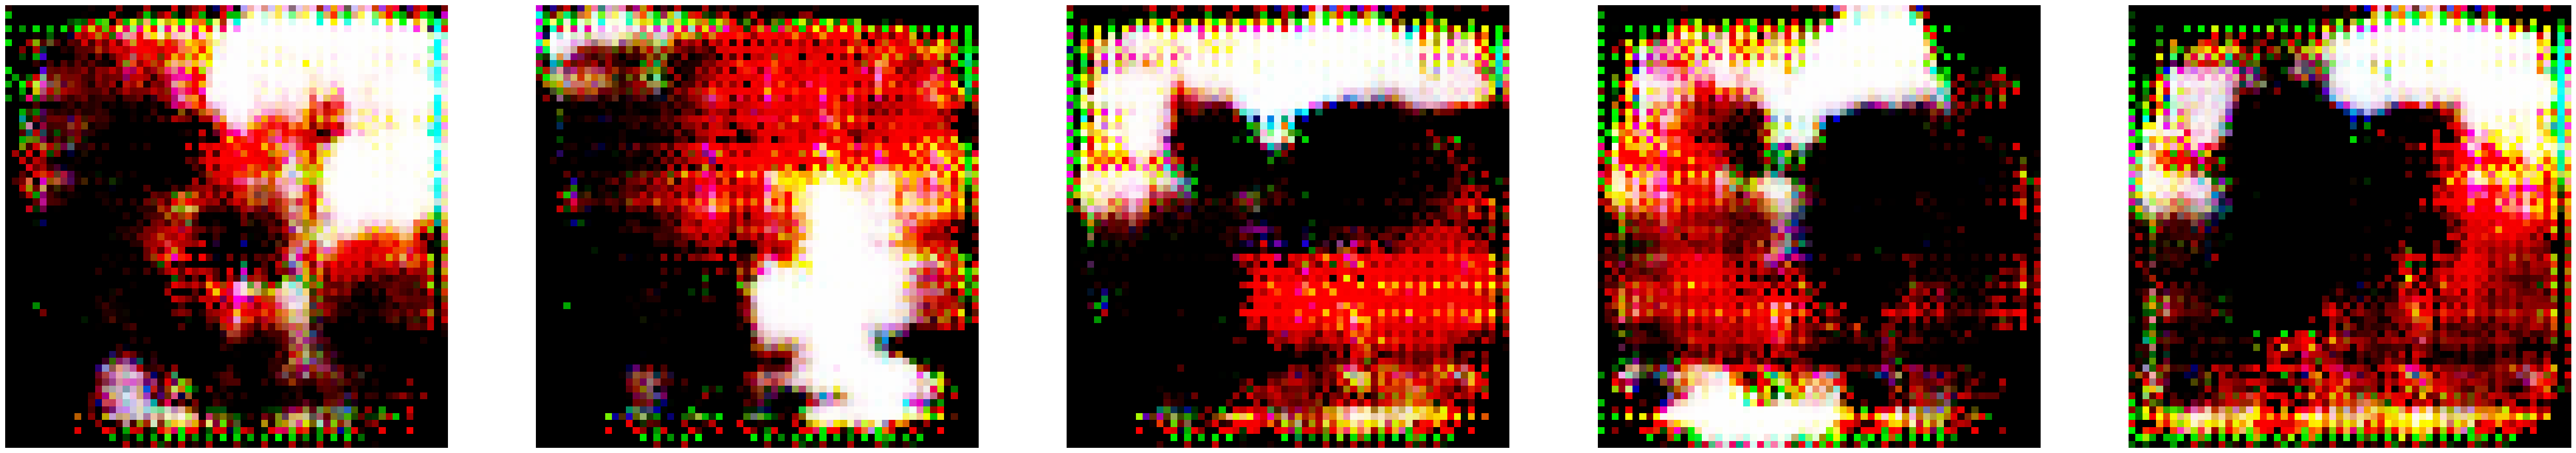

 50%|█████     | 1/2 [00:02<00:02,  2.00s/it]

[32/100][1/2] Loss_D: 0.6186 Loss_G: 2.2761 D(x): 0.7006 D(G(z)): 0.1325 / 0.0868


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

[32/100][2/2] Loss_D: 0.9074 Loss_G: 1.7421 D(x): 0.5749 D(G(z)): 0.1912 / 0.1756


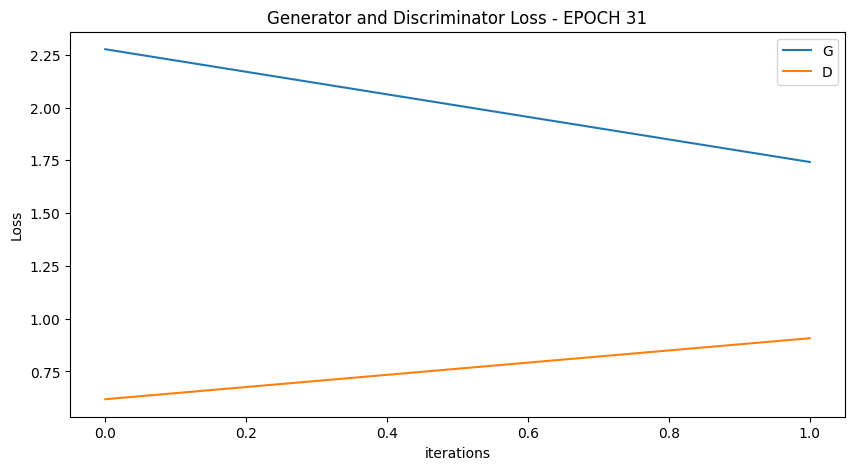

 50%|█████     | 1/2 [00:02<00:02,  2.24s/it]

[33/100][1/2] Loss_D: 0.9857 Loss_G: 3.1353 D(x): 0.8530 D(G(z)): 0.4471 / 0.0388


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

[33/100][2/2] Loss_D: 1.5627 Loss_G: 1.3578 D(x): 0.3116 D(G(z)): 0.0913 / 0.3333


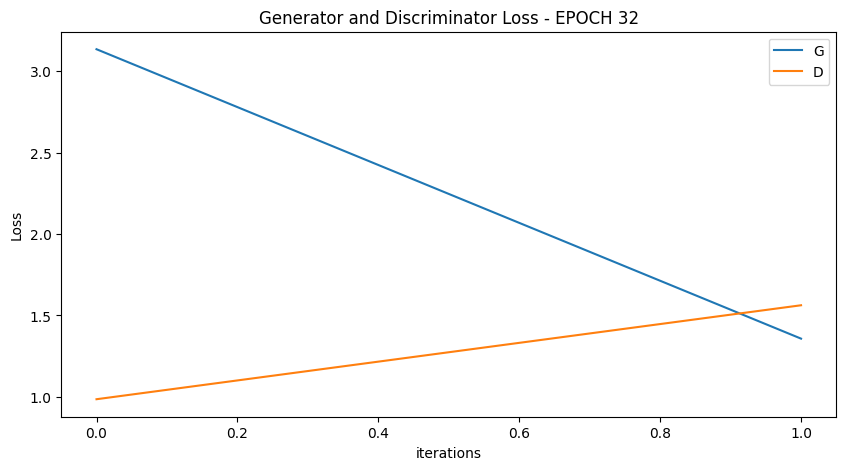

 50%|█████     | 1/2 [00:02<00:02,  2.42s/it]

[34/100][1/2] Loss_D: 1.2715 Loss_G: 2.3466 D(x): 0.8553 D(G(z)): 0.5129 / 0.0823


100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

[34/100][2/2] Loss_D: 1.0483 Loss_G: 1.8742 D(x): 0.4550 D(G(z)): 0.2090 / 0.1497


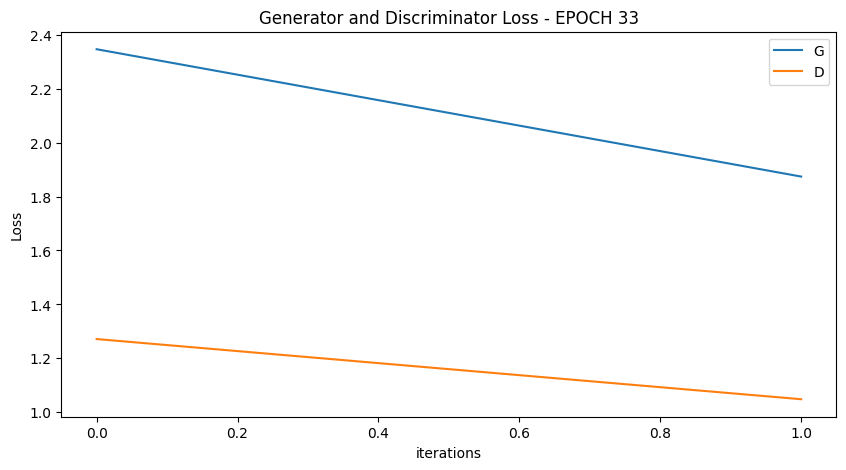

 50%|█████     | 1/2 [00:02<00:02,  2.24s/it]

[35/100][1/2] Loss_D: 1.1290 Loss_G: 1.9505 D(x): 0.7038 D(G(z)): 0.3780 / 0.1366


100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

[35/100][2/2] Loss_D: 1.1329 Loss_G: 1.7563 D(x): 0.4727 D(G(z)): 0.2549 / 0.1567


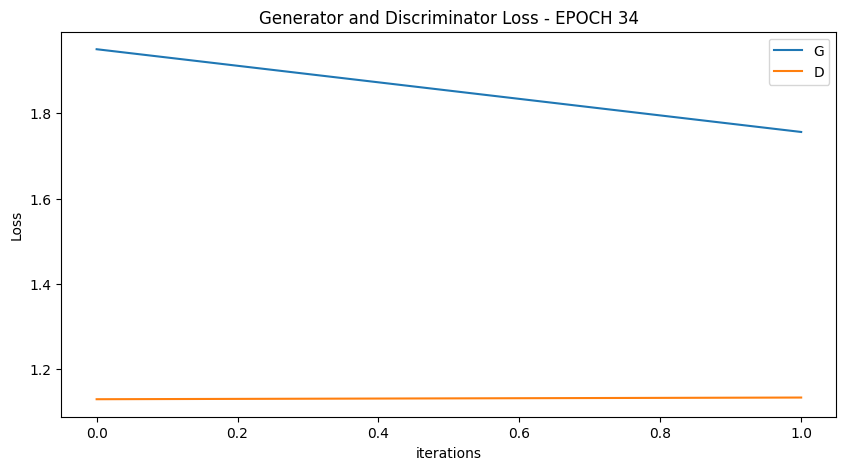

 50%|█████     | 1/2 [00:02<00:02,  2.58s/it]

[36/100][1/2] Loss_D: 1.2351 Loss_G: 2.9259 D(x): 0.7737 D(G(z)): 0.5187 / 0.0448


100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

[36/100][2/2] Loss_D: 0.9850 Loss_G: 2.3250 D(x): 0.4324 D(G(z)): 0.0849 / 0.0887


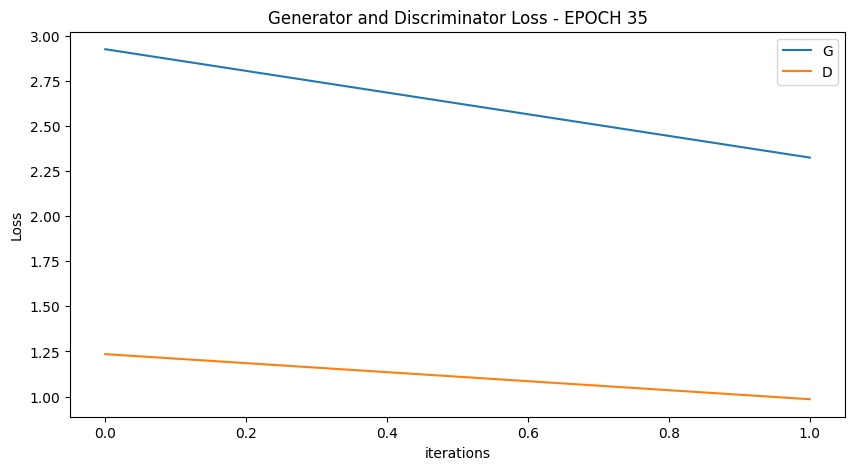

 50%|█████     | 1/2 [00:01<00:01,  1.98s/it]

[37/100][1/2] Loss_D: 0.8083 Loss_G: 2.0753 D(x): 0.7677 D(G(z)): 0.3198 / 0.1136


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

[37/100][2/2] Loss_D: 0.7060 Loss_G: 2.7929 D(x): 0.6886 D(G(z)): 0.1563 / 0.0493


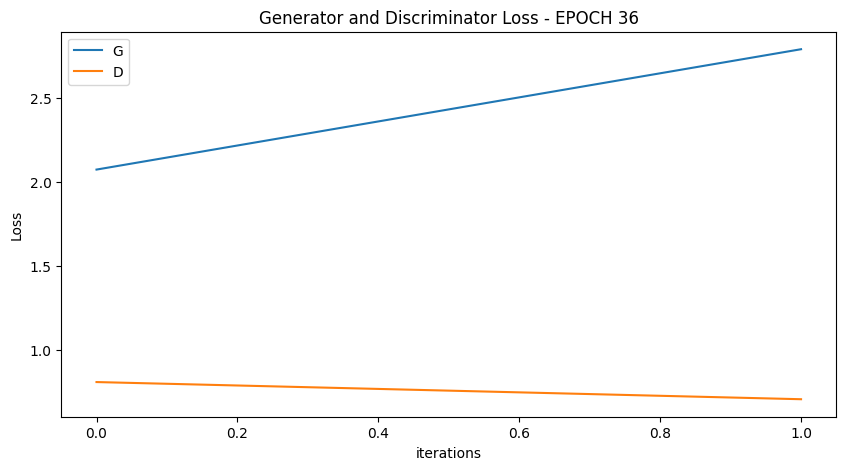

 50%|█████     | 1/2 [00:02<00:02,  2.18s/it]

[38/100][1/2] Loss_D: 0.7533 Loss_G: 2.9838 D(x): 0.7802 D(G(z)): 0.2571 / 0.0428


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

[38/100][2/2] Loss_D: 0.8255 Loss_G: 1.8152 D(x): 0.5127 D(G(z)): 0.0883 / 0.1403


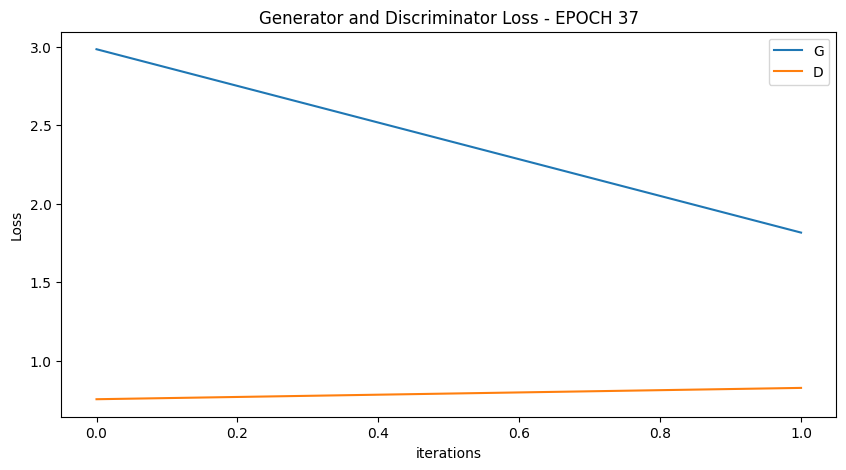

 50%|█████     | 1/2 [00:02<00:02,  2.66s/it]

[39/100][1/2] Loss_D: 0.7799 Loss_G: 1.9770 D(x): 0.7632 D(G(z)): 0.2702 / 0.1336


100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

[39/100][2/2] Loss_D: 1.0033 Loss_G: 1.8160 D(x): 0.5738 D(G(z)): 0.2949 / 0.1488


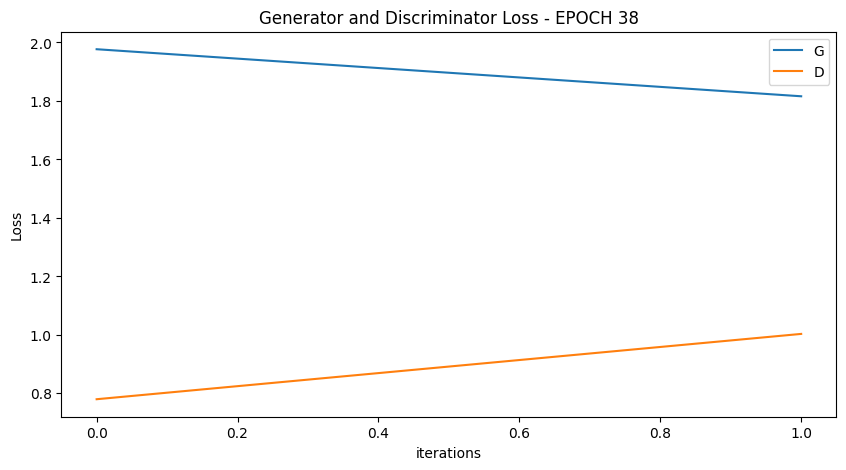

 50%|█████     | 1/2 [00:02<00:02,  2.82s/it]

[40/100][1/2] Loss_D: 0.8786 Loss_G: 2.3688 D(x): 0.8063 D(G(z)): 0.3563 / 0.0823


100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

[40/100][2/2] Loss_D: 0.7408 Loss_G: 2.8157 D(x): 0.7718 D(G(z)): 0.2438 / 0.0561


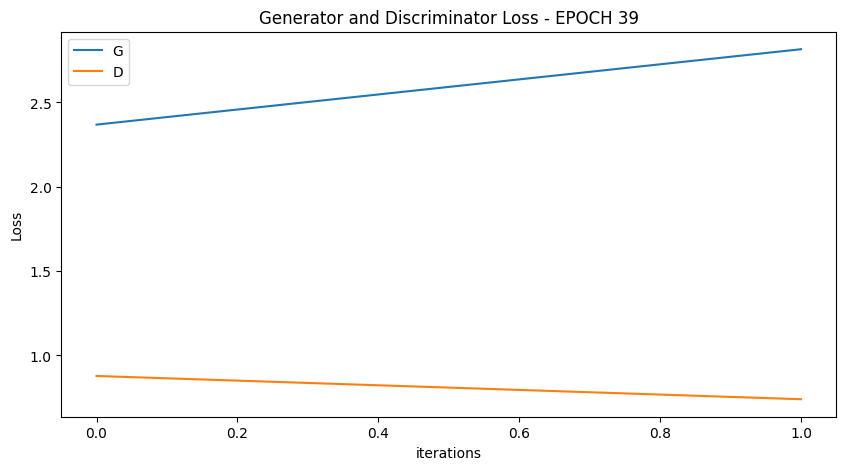

 50%|█████     | 1/2 [00:02<00:02,  2.21s/it]

[41/100][1/2] Loss_D: 0.8266 Loss_G: 1.8924 D(x): 0.5851 D(G(z)): 0.1337 / 0.1503


100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

[41/100][2/2] Loss_D: 0.8379 Loss_G: 1.8670 D(x): 0.6450 D(G(z)): 0.1875 / 0.1376


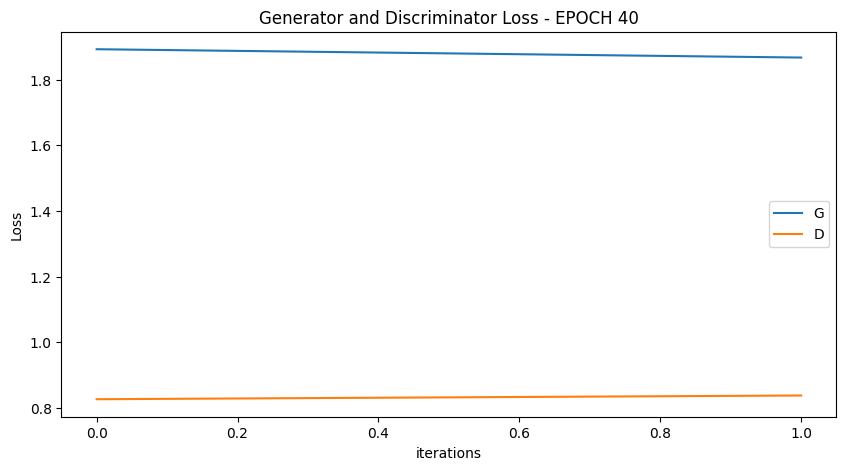

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


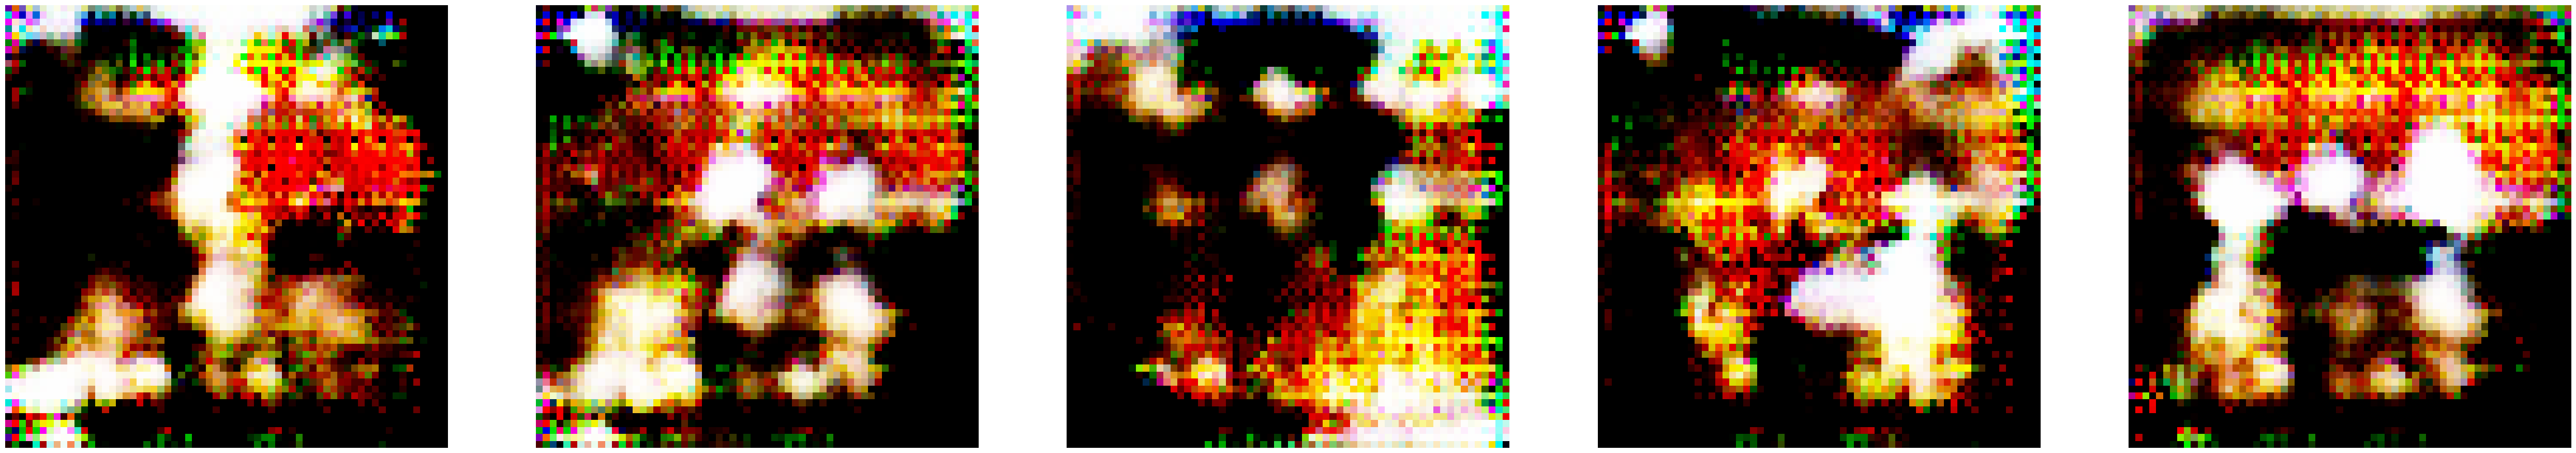

 50%|█████     | 1/2 [00:02<00:02,  2.28s/it]

[42/100][1/2] Loss_D: 1.0327 Loss_G: 3.3584 D(x): 0.8316 D(G(z)): 0.4592 / 0.0274


100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

[42/100][2/2] Loss_D: 1.4199 Loss_G: 1.8608 D(x): 0.3027 D(G(z)): 0.1059 / 0.1588


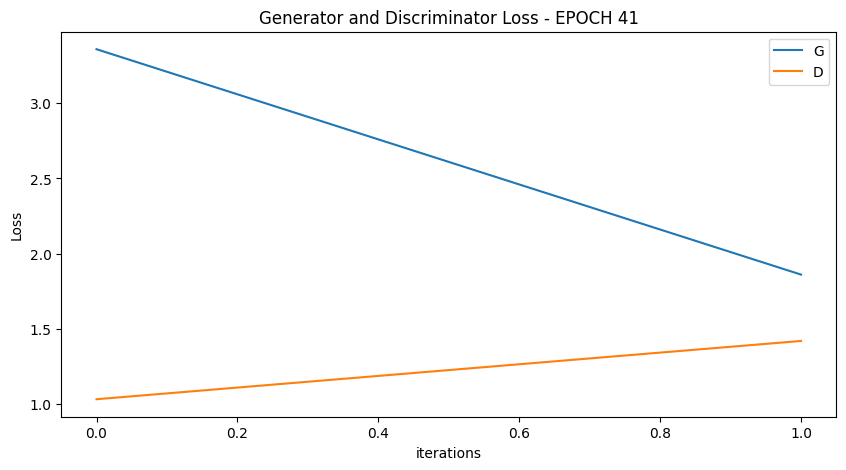

 50%|█████     | 1/2 [00:02<00:02,  2.24s/it]

[43/100][1/2] Loss_D: 0.9745 Loss_G: 2.2128 D(x): 0.6837 D(G(z)): 0.3646 / 0.0990


100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

[43/100][2/2] Loss_D: 1.4678 Loss_G: 1.2033 D(x): 0.3385 D(G(z)): 0.2703 / 0.3190


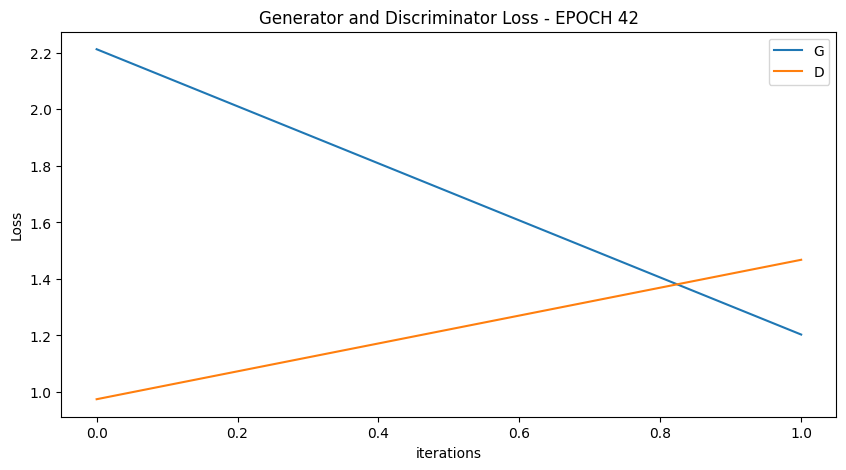

 50%|█████     | 1/2 [00:02<00:02,  2.36s/it]

[44/100][1/2] Loss_D: 1.3773 Loss_G: 3.2789 D(x): 0.8669 D(G(z)): 0.5934 / 0.0318


100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

[44/100][2/2] Loss_D: 1.3857 Loss_G: 2.0087 D(x): 0.3251 D(G(z)): 0.2062 / 0.1150


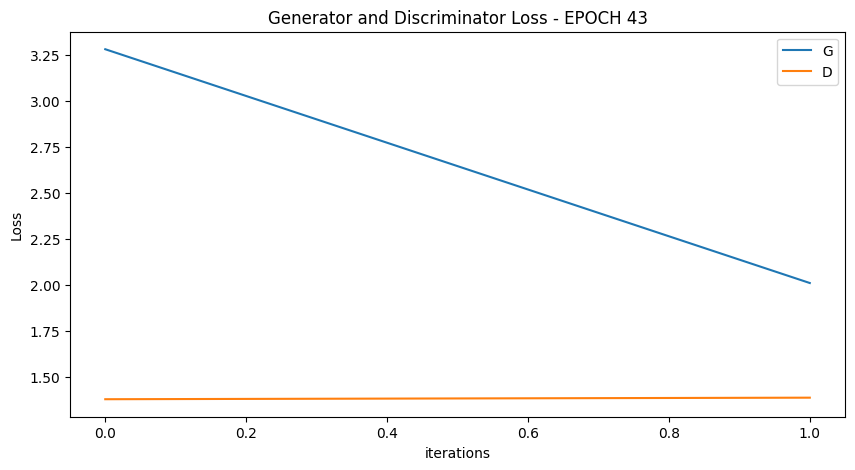

 50%|█████     | 1/2 [00:03<00:03,  3.15s/it]

[45/100][1/2] Loss_D: 1.1294 Loss_G: 1.6179 D(x): 0.4977 D(G(z)): 0.2960 / 0.1926


100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

[45/100][2/2] Loss_D: 1.0909 Loss_G: 2.4747 D(x): 0.6634 D(G(z)): 0.3824 / 0.0847


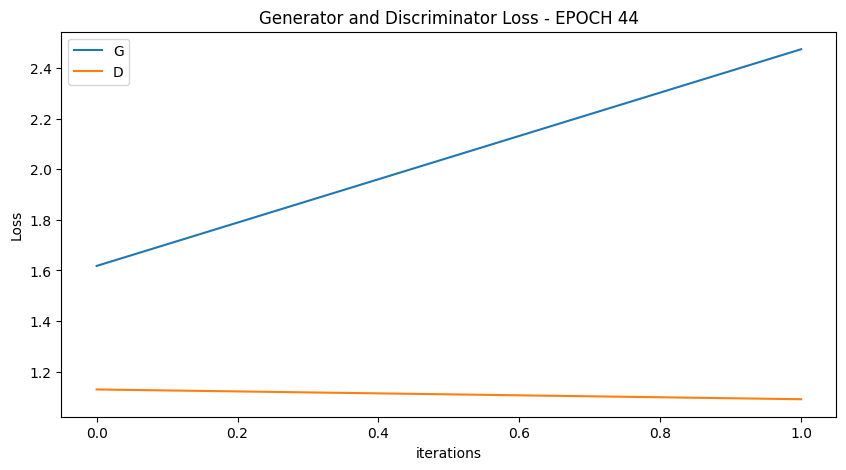

 50%|█████     | 1/2 [00:02<00:02,  2.37s/it]

[46/100][1/2] Loss_D: 0.9093 Loss_G: 2.0238 D(x): 0.6692 D(G(z)): 0.2883 / 0.1153


100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

[46/100][2/2] Loss_D: 1.0175 Loss_G: 2.0520 D(x): 0.5544 D(G(z)): 0.2641 / 0.1553


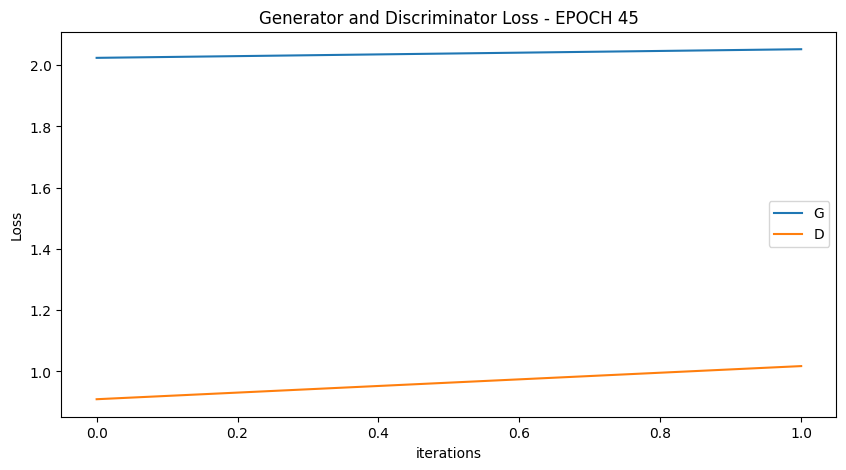

 50%|█████     | 1/2 [00:02<00:02,  2.18s/it]

[47/100][1/2] Loss_D: 1.0588 Loss_G: 2.0492 D(x): 0.6814 D(G(z)): 0.3217 / 0.1208


100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

[47/100][2/2] Loss_D: 0.7408 Loss_G: 2.2303 D(x): 0.7200 D(G(z)): 0.2442 / 0.1171


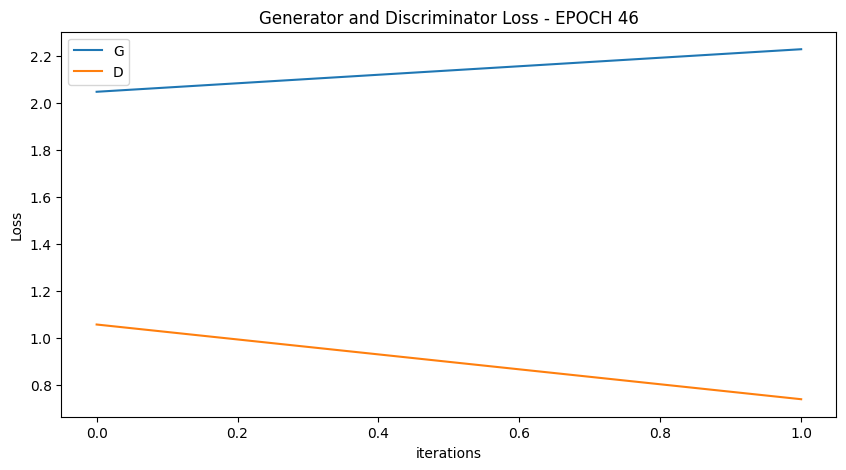

 50%|█████     | 1/2 [00:02<00:02,  2.72s/it]

[48/100][1/2] Loss_D: 0.7624 Loss_G: 2.2858 D(x): 0.7391 D(G(z)): 0.2463 / 0.1042


100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

[48/100][2/2] Loss_D: 0.8719 Loss_G: 2.0235 D(x): 0.5518 D(G(z)): 0.2062 / 0.1341


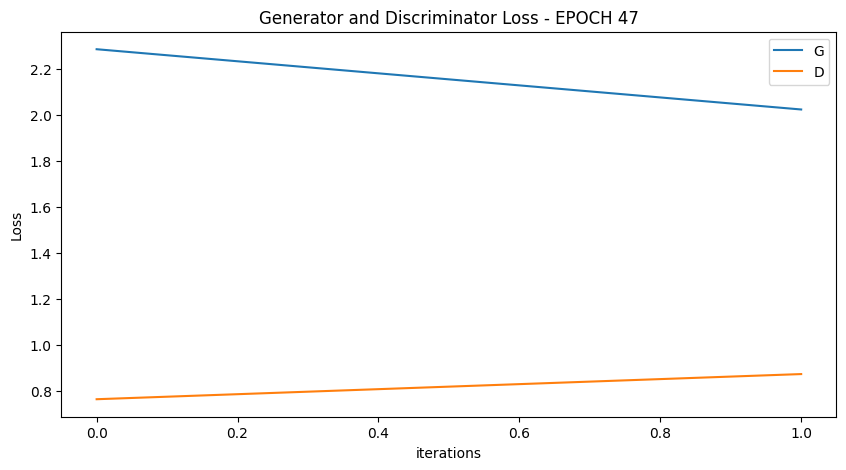

 50%|█████     | 1/2 [00:02<00:02,  2.66s/it]

[49/100][1/2] Loss_D: 0.8082 Loss_G: 2.0700 D(x): 0.7458 D(G(z)): 0.2944 / 0.1200


100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

[49/100][2/2] Loss_D: 0.9593 Loss_G: 2.1811 D(x): 0.6298 D(G(z)): 0.2320 / 0.1049


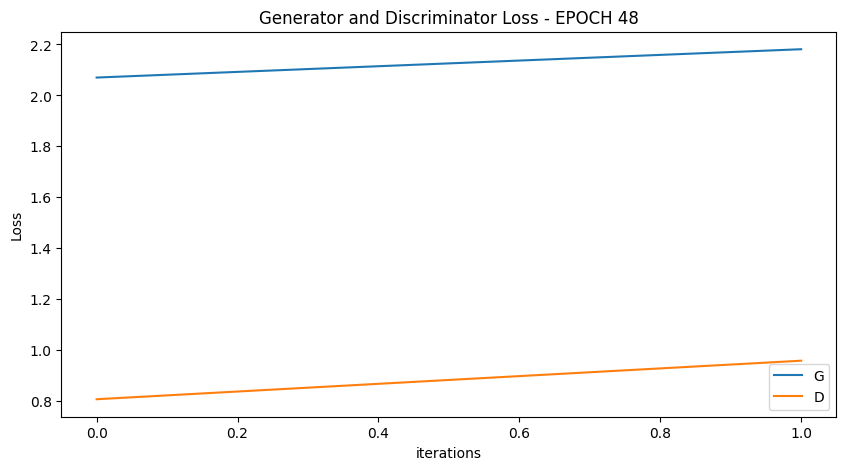

 50%|█████     | 1/2 [00:02<00:02,  2.22s/it]

[50/100][1/2] Loss_D: 0.9442 Loss_G: 2.4349 D(x): 0.7201 D(G(z)): 0.3304 / 0.0761


100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

[50/100][2/2] Loss_D: 0.6801 Loss_G: 2.3649 D(x): 0.6697 D(G(z)): 0.1093 / 0.0935


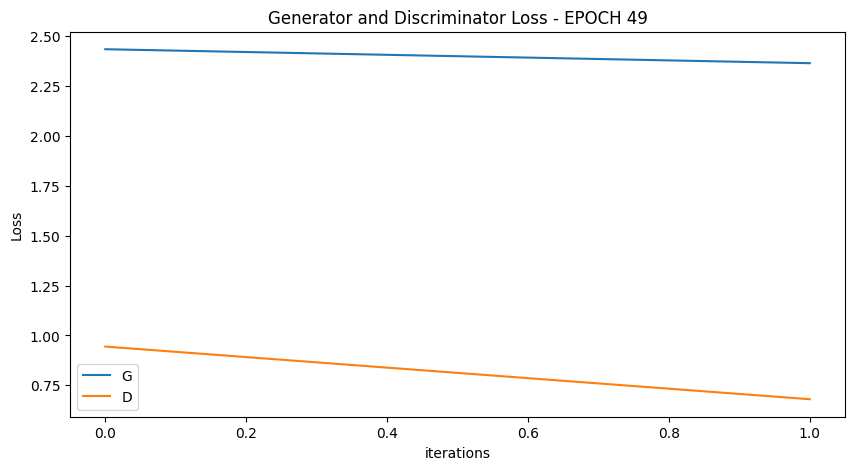

 50%|█████     | 1/2 [00:02<00:02,  2.38s/it]

[51/100][1/2] Loss_D: 0.7654 Loss_G: 2.1932 D(x): 0.7557 D(G(z)): 0.2565 / 0.1065


 50%|█████     | 1/2 [00:03<00:03,  3.07s/it]


KeyboardInterrupt: 

In [119]:
import time
#import tqdm
from tqdm import tqdm
for epoch in range(epochs):
    
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)
    

# end of gan

In [120]:
# Sequential Neural Network Model 

from keras.src import Sequential
from keras.layers import MaxPooling2D, Conv2D, Dense



def define_model():
    model = Sequential([
    Conv2D(filters=32,
           input_shape=(10,10,3),
           kernel_size=(4,4),
           activation='relu'),

    MaxPooling2D(pool_size=(2, 2)),


    Dense(2),
    ])
    return model
    

In [121]:
# Define discriminator Model
# Setup
from keras.src import Sequential
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten, Dropout, LeakyReLU


def discriminator_Model(in_shape=(28,28,1)):
 model = Sequential()
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Flatten())
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 #opt = Adam(lr=0.0002, beta_1=0.5)
 #model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model
 

In [123]:
# Define model
import warnings
warnings.filterwarnings('ignore')
#model = define_model()
model = discriminator_Model()

In [124]:
# Model summery
model.summary()


# Model Compiler
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         3,137 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,705 (159.00 KB)

 Trainable params: 40,705 (159.00 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
import keras
from keras import Model, layers
#from keras.layers import Add, Dense, Dropout, Embedding, GlobalAveragePooling1D, Input, Layer, LayerNormalization, MultiHeadAttention
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)

In [127]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [128]:
from keras import ops
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [129]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config  

In [130]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    print("input")
    print(input)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    print("okkkk")
    return model


2.16.1
starting wtih vit model
input
<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x000002594C1F3800>>

okkkk
vit summary


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, 144, 108)  │          0 │ data_augmentatio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 144, 64)   │     16,192 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 144, 64)   │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 144, 128)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 144, 64)   │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 144, 64)   │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 144, 64)   │          0 │ dropout_4[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 144, 128)  │          0 │ dense_4[0][0]   

 Total params: 21,658,569 (82.62 MB)

 Trainable params: 21,658,562 (82.62 MB)

 Non-trainable params: 7 (32.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accuracy: 0.6207 - loss: 1.2222
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ./model.hdf5.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 0.6207 - loss: 1.2222 - val_accuracy: 1.0000 - val_loss: 0.0655
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.9655 - loss: 0.3459
Epoch 2: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9655 - loss: 0.3459 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 933ms/step - accuracy: 1.0000 - loss: 0.0738
Epoch 3: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0738 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 4: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0035 - val_accura

Text(0.5, 1.0, 'Training and Validation Accuracy')

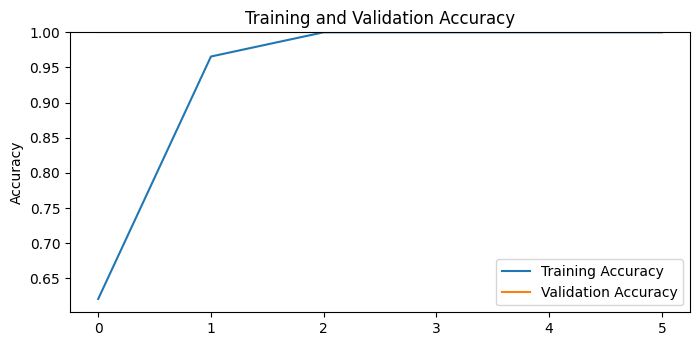

In [131]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)
print("starting wtih vit model")
model = create_vit_classifier()
print("vit summary")
model.summary()
#create callback
filepath = 'my_best_model.hdf5.keras'
# autosave best Model
#best_model_file = "model.h5.keras"
# model.save_weights('model_saved.h5')
# from keras import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath = './model.hdf5.weights.h5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')
# early stop
from keras import *
earlystop = EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

callbacks = [earlystop, checkpoint]



# Compile the Model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator, epochs=20,validation_data=validate_generator, 
                    callbacks=[callbacks]
                    )

# Evaluate the Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')